In [1]:
# @joseMaria 
# JMGONB

In [2]:

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [4]:
df=pd.read_csv(url)


In [5]:
df=df.set_index("iso_code")
df

continent       location        date  total_cases  new_cases  \
iso_code                                                                
AFG           Asia    Afghanistan  2019-12-31          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-01          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-02          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-03          0.0        0.0   
AFG           Asia    Afghanistan  2020-01-04          0.0        0.0   
...            ...            ...         ...          ...        ...   
NaN            NaN  International  2020-02-28        705.0        0.0   
NaN            NaN  International  2020-02-29        705.0        0.0   
NaN            NaN  International  2020-03-01        705.0        0.0   
NaN            NaN  International  2020-03-02        705.0        0.0   
NaN            NaN  International  2020-03-10        696.0       -9.0   

          total_deaths  new_deaths  total_cases_per_million  \
iso_code                                                      
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
AFG                0.0         0.0                      0.0   
...                ...         ...                      ...   
NaN                4.0         0.0                      NaN   
NaN                6.0         2.0                      NaN   
NaN                6.0         0.0                      NaN   
NaN                6.0         0.0                      NaN   
NaN                7.0         1.0                      NaN   

          new_cases_per_million  total_deaths_per_million  ...  aged_70_older  \
iso_code                                                   ...                  
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
AFG                         0.0                       0.0  ...          1.337   
...                         ...                       ...  ...            ...   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   
NaN                         NaN                       NaN  ...            NaN   

          gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
iso_code                                                           
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
AFG             1803.987              NaN                597.029   
...                  ...              ...                    ...   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   
NaN                  NaN              NaN                    NaN   

          diabetes_prevalence  female_smokers  male_smokers  \
iso_code                                                      
AFG                      9.59             NaN           NaN   
AFG                      9.59             NaN           NaN   
AFG                      9.59             NaN   

In [6]:
df1=df.loc[["IND","PER","USA","FRA","ESP"],:]
df1.head()

continent location        date  total_cases  new_cases  total_deaths  \
iso_code                                                                        
IND           Asia    India  2019-12-31          0.0        0.0           0.0   
IND           Asia    India  2020-01-01          0.0        0.0           0.0   
IND           Asia    India  2020-01-02          0.0        0.0           0.0   
IND           Asia    India  2020-01-03          0.0        0.0           0.0   
IND           Asia    India  2020-01-04          0.0        0.0           0.0   

          new_deaths  total_cases_per_million  new_cases_per_million  \
iso_code                                                               
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   
IND              0.0                      0.0                    0.0   

          total_deaths_per_million  ...  aged_70_older  gdp_per_capita  \
iso_code                            ...                                  
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   
IND                            0.0  ...          3.414        6426.674   

          extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
iso_code                                                                
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   
IND                  21.2                 282.28                10.39   

          female_smokers  male_smokers  handwashing_facilities  \
iso_code                                                         
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   
IND                  1.9          20.6                   59.55   

          hospital_beds_per_thousand life_expectancy  
iso_code                                              
IND                             0.53           69.66  
IND                             0.53           69.66  
IND                             0.53           69.66  
IND                             0.53           69.66  
IND                             0.53           69.66  

[5 rows x 35 columns]

In [7]:
df1['date']=pd.to_datetime(df1['date'],format="%Y/%m/%d")

In [8]:
# Cambiamos los valores Nan por ceros

h=df1.pivot_table('new_deaths', index='date',columns='location')
h=h.fillna(0)
h

location    France   India    Peru  Spain  United States
date                                                    
2019-12-31     0.0     0.0     0.0    0.0            0.0
2020-01-01     0.0     0.0     0.0    0.0            0.0
2020-01-02     0.0     0.0     0.0    0.0            0.0
2020-01-03     0.0     0.0     0.0    0.0            0.0
2020-01-04     0.0     0.0     0.0    0.0            0.0
...            ...     ...     ...    ...            ...
2020-08-10     0.0  1007.0   228.0   73.0          513.0
2020-08-11    16.0   871.0   204.0    5.0          523.0
2020-08-12    14.0   834.0   225.0   -2.0         1076.0
2020-08-13    17.0   942.0   212.0   26.0         1490.0
2020-08-14    17.0  1007.0  3935.0    0.0         1083.0

[228 rows x 5 columns]

In [9]:
h.index=pd.to_datetime(h.index)  

In [10]:
# El 27 de abril detectamos un outlier en España. La cifra que aparece es de 0, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 331. La cambiamos.
h.loc['2020-04-27'][3]=331

In [11]:
# El 22 de mayo detectamos un outlier en España. La cifra que aparece es de 688, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y la cifra ese día fue de 56. La cambiamos.
h.loc['2020-05-22'][3]=56

In [12]:
 #El 25 de mayo detectamos otro outlier en España. La cifra que aparece es de -1918, contra la tendencia en esa época. Buscamos la información del Ministerio de Sanidad y ese día no se facilitó cifra concreta sino que se dio como dato la de los fallecidos en los últimos 7 días, que fue 50, entendemos que era la tendencia. La cambiamos.
h.loc['2020-05-25'][3]=50

In [13]:
h["d_averages"]=h.mean(axis=1)
h

location    France   India    Peru  Spain  United States  d_averages
date                                                                
2019-12-31     0.0     0.0     0.0    0.0            0.0         0.0
2020-01-01     0.0     0.0     0.0    0.0            0.0         0.0
2020-01-02     0.0     0.0     0.0    0.0            0.0         0.0
2020-01-03     0.0     0.0     0.0    0.0            0.0         0.0
2020-01-04     0.0     0.0     0.0    0.0            0.0         0.0
...            ...     ...     ...    ...            ...         ...
2020-08-10     0.0  1007.0   228.0   73.0          513.0       364.2
2020-08-11    16.0   871.0   204.0    5.0          523.0       323.8
2020-08-12    14.0   834.0   225.0   -2.0         1076.0       429.4
2020-08-13    17.0   942.0   212.0   26.0         1490.0       537.4
2020-08-14    17.0  1007.0  3935.0    0.0         1083.0      1208.4

[228 rows x 6 columns]

In [14]:
h.loc['2020-05-01':'2020-06-01']

location    France  India   Peru  Spain  United States  d_averages
date                                                              
2020-05-01   289.0   73.0  108.0  281.0         2040.0       558.2
2020-05-02   218.0   71.0   73.0  276.0         2062.0       540.0
2020-05-03   166.0   83.0   76.0  164.0         1317.0       361.2
2020-05-04   135.0   72.0   86.0  164.0         1297.0       350.8
2020-05-05   306.0  195.0   58.0  185.0         1252.0       399.2
2020-05-06   330.0  126.0  100.0  244.0         2144.0       588.8
2020-05-07   278.0   89.0   89.0  213.0         2353.0       604.4
2020-05-08   178.0  103.0   94.0  181.0         2239.0       559.0
2020-05-09   243.0   95.0   87.0  227.0         1510.0       432.4
2020-05-10    80.0  128.0  100.0  143.0         1614.0       413.0
2020-05-11    70.0   97.0   75.0  123.0          734.0       219.8
2020-05-12   263.0   87.0   72.0  176.0         1156.0       350.8
2020-05-13   348.0  122.0   96.0  184.0         1703.0       490.6
2020-05-14    83.0  134.0  112.0  217.0         1746.0       458.4
2020-05-15   351.0  100.0   98.0  138.0         1773.0       492.0
2020-05-16   130.0  103.0  126.0  104.0         1662.0       425.0
2020-05-17    88.0  120.0  130.0   87.0         1186.0       322.2
2020-05-18    68.0  157.0  125.0   59.0          808.0       243.4
2020-05-19   186.0  134.0  141.0   69.0          791.0       264.2
2020-05-20   125.0  140.0  125.0  110.0         1568.0       413.6
2020-05-21   110.0  132.0  110.0   52.0         1518.0       384.4
2020-05-22    83.0  148.0  124.0   56.0         1263.0       334.8
2020-05-23    74.0  137.0   96.0   50.0         1305.0       332.4
2020-05-24    43.0  147.0  129.0   74.0         1080.0       294.6
2020-05-25    35.0  154.0   83.0   50.0          633.0       191.0
2020-05-26    65.0  146.0  173.0  283.0          500.0       233.4
2020-05-27    98.0  170.0  159.0    1.0          696.0       224.8
2020-05-28    66.0  194.0  195.0    1.0         1526.0       396.4
2020-05-29    66.0  175.0  116.0    2.0         1175.0       306.8
2020-05-30    52.0  265.0  131.0    4.0         1219.0       334.2
2020-05-31    57.0  193.0  141.0    2.0          945.0       267.6
2020-06-01    31.0  230.0  135.0    0.0          602.0       199.6

In [15]:
h.loc['2020-05-01':'2020-06-01'].max()

location
France            351.0
India             265.0
Peru              195.0
Spain             283.0
United States    2353.0
d_averages        604.4
dtype: float64

In [16]:
h=h["d_averages"]

In [17]:
h=h.to_frame()
h

d_averages
date                  
2019-12-31         0.0
2020-01-01         0.0
2020-01-02         0.0
2020-01-03         0.0
2020-01-04         0.0
...                ...
2020-08-10       364.2
2020-08-11       323.8
2020-08-12       429.4
2020-08-13       537.4
2020-08-14      1208.4

[228 rows x 1 columns]

(array([18261, 18262, 18293, 18322, 18353, 18383, 18414, 18444, 18475,
        18488], dtype=int64),
 <a list of 10 Text major ticklabel objects>)

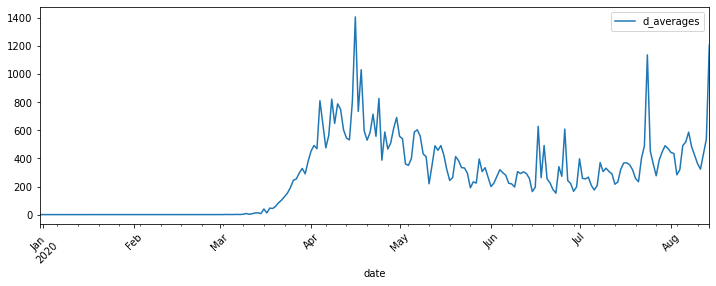

In [18]:
h.plot(figsize=(12,4))
plt.xticks(rotation=45)




In [19]:
n_d=df1.pivot_table('new_deaths', index='date',columns='location')
n_d=n_d.fillna(0)
n_d

location    France   India    Peru  Spain  United States
date                                                    
2019-12-31     0.0     0.0     0.0    0.0            0.0
2020-01-01     0.0     0.0     0.0    0.0            0.0
2020-01-02     0.0     0.0     0.0    0.0            0.0
2020-01-03     0.0     0.0     0.0    0.0            0.0
2020-01-04     0.0     0.0     0.0    0.0            0.0
...            ...     ...     ...    ...            ...
2020-08-10     0.0  1007.0   228.0   73.0          513.0
2020-08-11    16.0   871.0   204.0    5.0          523.0
2020-08-12    14.0   834.0   225.0   -2.0         1076.0
2020-08-13    17.0   942.0   212.0   26.0         1490.0
2020-08-14    17.0  1007.0  3935.0    0.0         1083.0

[228 rows x 5 columns]

In [20]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON TOTAL DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$
    #*Total de casos en los 5 paises seleccionados. Datos que se van actualizando por día a la fecha actual
    #*Total de casos durante el perido de cuarentena en Francia
    #*Total de casos durante el perido de cuarentena en India
    #*Total de casos durante el perido de cuarentena en Perú
    #*Total de casos durante el perido de cuarentena en Spain
    #*Total de casos durante el perido de cuarentena en EEUU




In [21]:
t_c=df1.pivot_table('total_cases', index='date',columns='location') #El 21-01-20 EEUU tiene el primer caso. Francia lo tiene  el 25-01-20, India 30-01-20 y España 1-02-2020 luego solo podemos quitar fechas anteriores al 21-01-2020
t_c=t_c.fillna(0)
t_c

location      France      India      Peru     Spain  United States
date                                                              
2019-12-31       0.0        0.0       0.0       0.0            0.0
2020-01-01       0.0        0.0       0.0       0.0            0.0
2020-01-02       0.0        0.0       0.0       0.0            0.0
2020-01-03       0.0        0.0       0.0       0.0            0.0
2020-01-04       0.0        0.0       0.0       0.0            0.0
...              ...        ...       ...       ...            ...
2020-08-10  197921.0  2215074.0  478024.0  322980.0      5044864.0
2020-08-11  202775.0  2268675.0  483133.0  326612.0      5094394.0
2020-08-12  204172.0  2329638.0  489680.0  329784.0      5141207.0
2020-08-13  206696.0  2396637.0  498555.0  337334.0      5197148.0
2020-08-14  209365.0  2461190.0  507996.0       0.0      5248242.0

[228 rows x 5 columns]

In [22]:
t_c=t_c.loc[~(t_c==0).all(axis=1)] #Total de casos: Eliminamos las filas cuyos valores son 0 en todas sus columnas
t_c

location      France      India      Peru     Spain  United States
date                                                              
2020-01-21       0.0        0.0       0.0       0.0            1.0
2020-01-22       0.0        0.0       0.0       0.0            1.0
2020-01-23       0.0        0.0       0.0       0.0            1.0
2020-01-24       0.0        0.0       0.0       0.0            1.0
2020-01-25       3.0        0.0       0.0       0.0            2.0
...              ...        ...       ...       ...            ...
2020-08-10  197921.0  2215074.0  478024.0  322980.0      5044864.0
2020-08-11  202775.0  2268675.0  483133.0  326612.0      5094394.0
2020-08-12  204172.0  2329638.0  489680.0  329784.0      5141207.0
2020-08-13  206696.0  2396637.0  498555.0  337334.0      5197148.0
2020-08-14  209365.0  2461190.0  507996.0       0.0      5248242.0

[207 rows x 5 columns]

In [23]:
t_c=t_c.iloc[:-1,:] #España contabiliza más tarde sus datos y tengo que poner el día de ayer como ultimo para que no salga a 0
t_c

location      France      India      Peru     Spain  United States
date                                                              
2020-01-21       0.0        0.0       0.0       0.0            1.0
2020-01-22       0.0        0.0       0.0       0.0            1.0
2020-01-23       0.0        0.0       0.0       0.0            1.0
2020-01-24       0.0        0.0       0.0       0.0            1.0
2020-01-25       3.0        0.0       0.0       0.0            2.0
...              ...        ...       ...       ...            ...
2020-08-09  197921.0  2153010.0  471012.0  314362.0      4998017.0
2020-08-10  197921.0  2215074.0  478024.0  322980.0      5044864.0
2020-08-11  202775.0  2268675.0  483133.0  326612.0      5094394.0
2020-08-12  204172.0  2329638.0  489680.0  329784.0      5141207.0
2020-08-13  206696.0  2396637.0  498555.0  337334.0      5197148.0

[206 rows x 5 columns]

Text(0.5, 1.0, 'TOTAL DE CASOS POR PAIS (PROGRESION)')

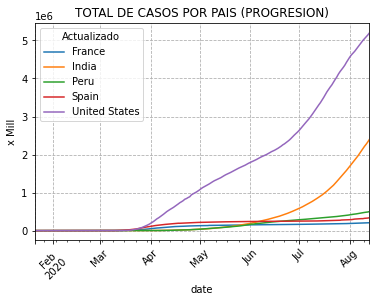

In [24]:
from matplotlib import pyplot as plt
t_c.plot()
plt.legend(title="Actualizado")
plt.xticks(rotation=45)
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')
plt.title("TOTAL DE CASOS POR PAIS (PROGRESION)")
 #Gráfica tendencia totales de los 6 paises casos por fechas

In [25]:
total_cas=t_c.iloc[-1,:]
total_cas
#Total de casos acumulados por pais

location
France            206696.0
India            2396637.0
Peru              498555.0
Spain             337334.0
United States    5197148.0
Name: 2020-08-13 00:00:00, dtype: float64

In [26]:
total_cas=total_cas.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL DE CASOS POR PAIS / VALORES')

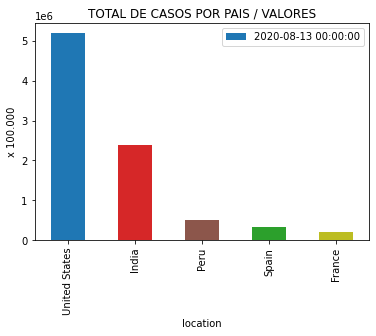

In [27]:

colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
total_cas.plot(kind='bar', color=colores_paises)
plt.legend()
plt.ylabel("x 100.000")
plt.title("TOTAL DE CASOS POR PAIS / VALORES") #Gráfica total casos por pais.(Responde a la pregunta bloque c numero 7 apartado a)

In [28]:
t_c_france=t_c.loc["2020-02-15":"2020-07-10","France"] #periodo del estado de emergencia en Francia
t_c_france

date
2020-02-15        11.0
2020-02-16        11.0
2020-02-17        12.0
2020-02-18        12.0
2020-02-19        12.0
                ...   
2020-07-06    166960.0
2020-07-07    168335.0
2020-07-08    168810.0
2020-07-09    169473.0
2020-07-10    170094.0
Name: France, Length: 147, dtype: float64

Text(0.5, 1.0, 'TOTAL CASOS FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA')

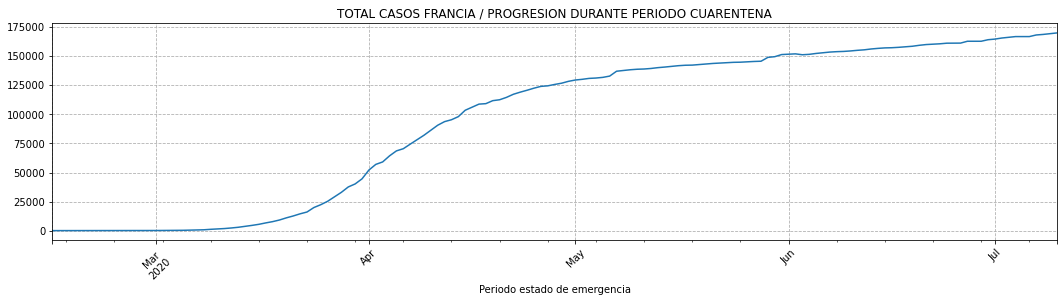

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.grid(linestyle ='dashed')
plt.title("TOTAL CASOS FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA")


In [30]:
t_c_india=t_c.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
t_c_india

date
2020-03-25        562.0
2020-03-26        649.0
2020-03-27        724.0
2020-03-28        873.0
2020-03-29        979.0
                ...    
2020-07-27    1435453.0
2020-07-28    1483156.0
2020-07-29    1531669.0
2020-07-30    1583792.0
2020-07-31    1638870.0
Name: India, Length: 129, dtype: float64

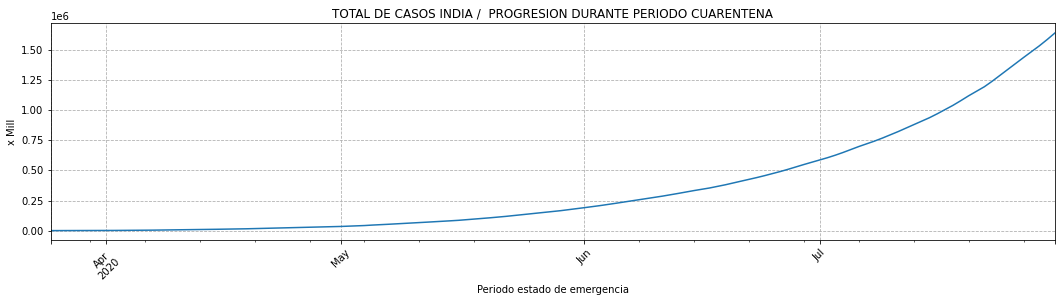

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS INDIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')


In [32]:
t_c_peru=t_c.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
t_c_peru

date
2020-03-16        71.0
2020-03-17        86.0
2020-03-18       117.0
2020-03-19       145.0
2020-03-20       234.0
                ...   
2020-06-26    268602.0
2020-06-27    272364.0
2020-06-28    275989.0
2020-06-29    279419.0
2020-06-30    282365.0
Name: Peru, Length: 107, dtype: float64

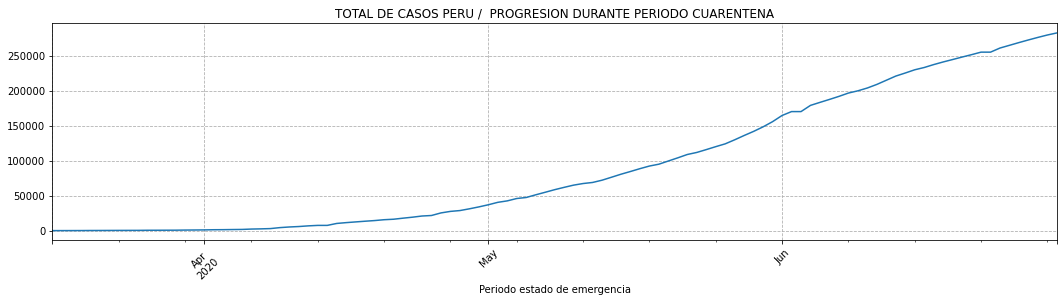

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS PERU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [34]:
t_c_spain=t_c.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
t_c_spain

date
2020-03-15      9785.0
2020-03-16     11491.0
2020-03-17     13994.0
2020-03-18     17688.0
2020-03-19     21735.0
                ...   
2020-05-21    233037.0
2020-05-22    234824.0
2020-05-23    235290.0
2020-05-24    235772.0
2020-05-25    235400.0
Name: Spain, Length: 72, dtype: float64

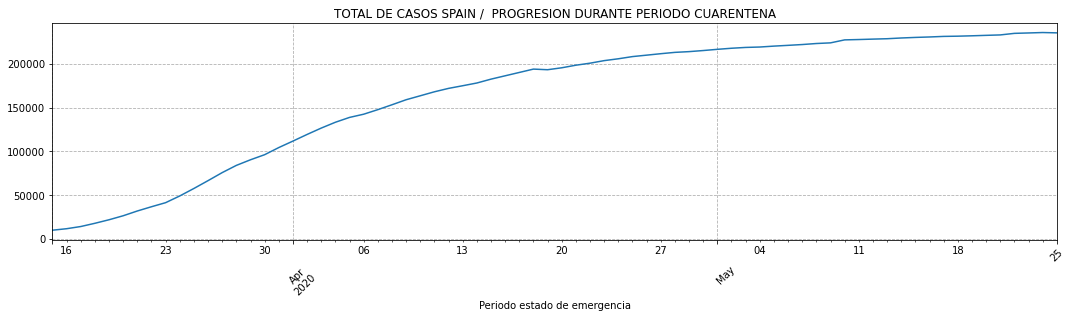

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS SPAIN /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [36]:
t_c_eeuu=t_c.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_c_eeuu

date
2020-04-07     368196.0
2020-04-08     398809.0
2020-04-09     432132.0
2020-04-10     466033.0
2020-04-11     501560.0
                ...    
2020-07-27    4234020.0
2020-07-28    4290263.0
2020-07-29    4351997.0
2020-07-30    4426982.0
2020-07-31    4495014.0
Name: United States, Length: 116, dtype: float64

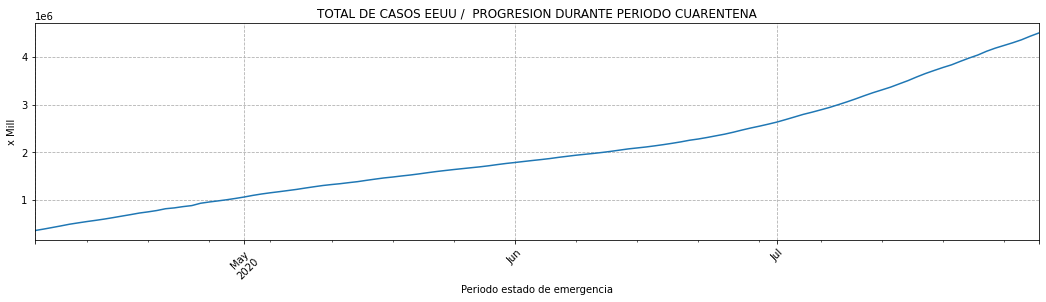

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_c_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL DE CASOS EEUU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.ylabel("x Mill")
plt.grid(linestyle ='dashed')



In [38]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON NUEVOS DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

    #*nuevos casos por día de Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*nuevos casos durante el perido de cuarentena en Francia
    #*nuevos casos durante el perido de cuarentena en India
    #*nuevos casos durante el perido de cuarentena en Perú
    #*nuevos casos durante el perido de cuarentena en Spain
    #*nuevos casos durante el perido de cuarentena en EEUU

In [39]:
n_c=df1.pivot_table('new_cases', index='date',columns='location')
n_c=n_c.fillna(0)


In [40]:
n_c=n_c.loc[~(n_c==0).all(axis=1)]
n_c
#Nuevos casos: Eliminamos las filas cuyos valores son 0 en todas sus columnas

location    France    India    Peru   Spain  United States
date                                                      
2020-01-21     0.0      0.0     0.0     0.0            1.0
2020-01-25     3.0      0.0     0.0     0.0            1.0
2020-01-27     0.0      0.0     0.0     0.0            3.0
2020-01-29     1.0      0.0     0.0     0.0            0.0
2020-01-30     1.0      1.0     0.0     0.0            0.0
...            ...      ...     ...     ...            ...
2020-08-10     0.0  62064.0  7012.0  8618.0        46847.0
2020-08-11  4854.0  53601.0  5109.0  3632.0        49530.0
2020-08-12  1397.0  60963.0  6547.0  3172.0        46813.0
2020-08-13  2524.0  66999.0  8875.0  7550.0        55941.0
2020-08-14  2669.0  64553.0  9441.0     0.0        51094.0

[191 rows x 5 columns]

<function matplotlib.pyplot.show(*args, **kw)>

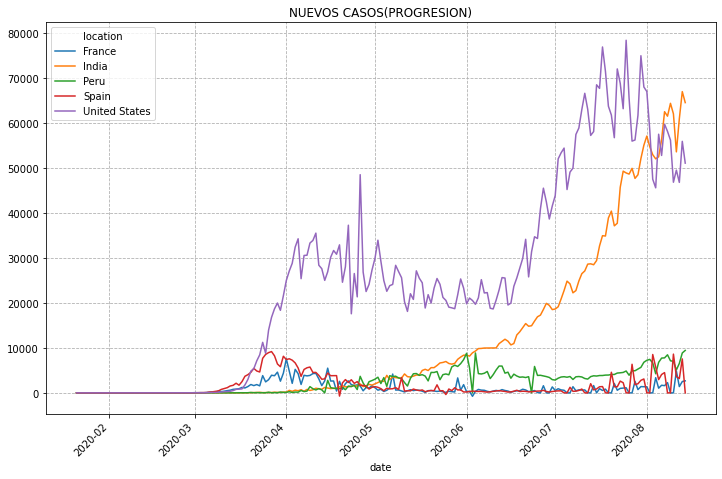

In [41]:
from matplotlib import pyplot
n_c.plot(figsize=(12,8))
plt.xticks(rotation=45)
plt.title("NUEVOS CASOS(PROGRESION)")
plt.grid(linestyle ='dashed')
pyplot.show
#Gráfica tendencia nuevos casos por fechas

In [42]:
total_n_cas=n_c.sum() 
total_n_cas

location
France            209365.0
India            2461190.0
Peru              507996.0
Spain             337334.0
United States    5248242.0
dtype: float64

In [43]:
total_n_cas=total_n_cas.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL NUEVOS CASOS')

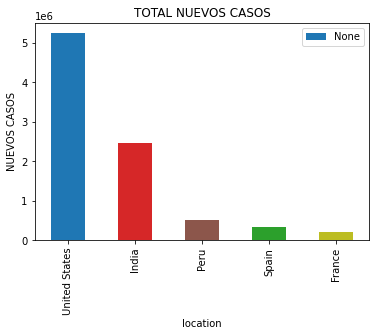

In [44]:
total_n_cas.plot(kind='bar',color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("NUEVOS CASOS")
plt.title("TOTAL NUEVOS CASOS")  #Gráfica total nuevos casos valores acumulados a dia actual.

<function matplotlib.pyplot.show(*args, **kw)>

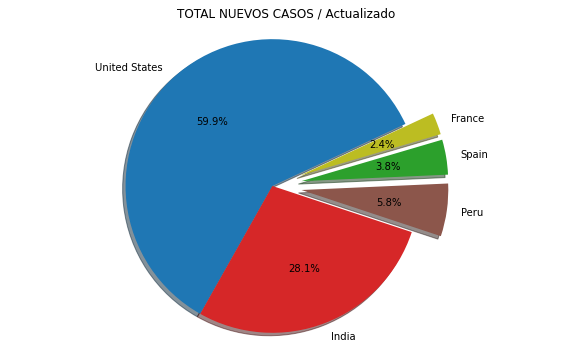

In [45]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
pais=("United States","India ","Peru ","Spain","France")
nuevos_casos=total_n_cas
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(nuevos_casos,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("TOTAL NUEVOS CASOS / Actualizado")
pyplot.show

In [46]:
t_n_france=n_c.loc["2020-02-15":"2020-07-10","France"] #periodo del estado de emergencia en Francia
t_n_france

date
2020-02-17       1.0
2020-02-21       0.0
2020-02-22       0.0
2020-02-25       0.0
2020-02-26       2.0
               ...  
2020-07-06       0.0
2020-07-07    1375.0
2020-07-08     475.0
2020-07-09     663.0
2020-07-10     621.0
Name: France, Length: 140, dtype: float64

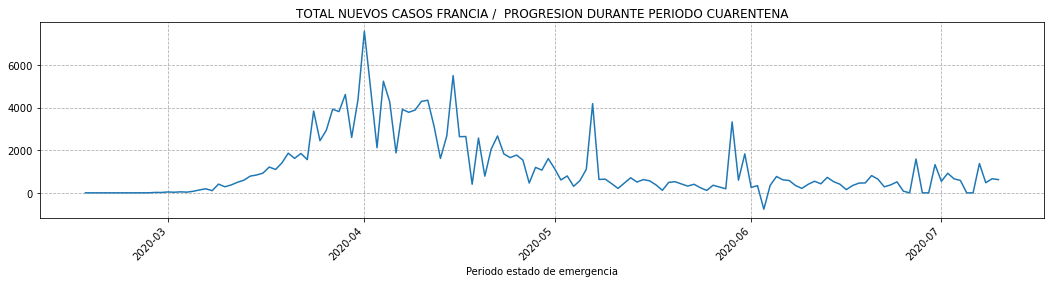

In [47]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS FRANCIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')


In [48]:
t_n_india=n_c.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
t_n_india

date
2020-03-25       70.0
2020-03-26       87.0
2020-03-27       75.0
2020-03-28      149.0
2020-03-29      106.0
               ...   
2020-07-27    49931.0
2020-07-28    47703.0
2020-07-29    48513.0
2020-07-30    52123.0
2020-07-31    55078.0
Name: India, Length: 129, dtype: float64

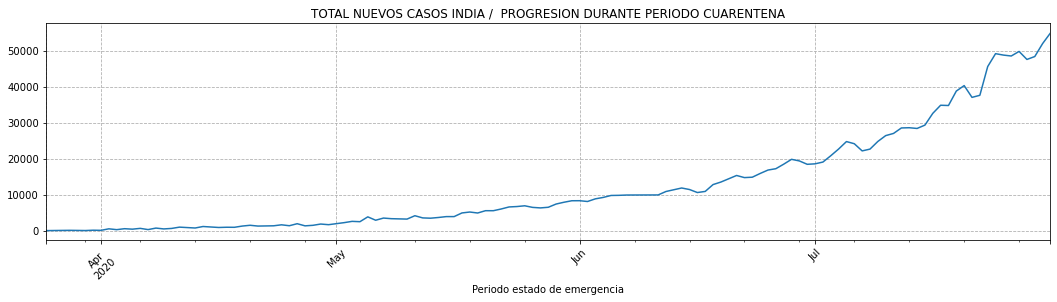

In [49]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS INDIA /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [50]:
t_n_peru=n_c.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
t_n_peru

date
2020-03-16      28.0
2020-03-17      15.0
2020-03-18      31.0
2020-03-19      28.0
2020-03-20      89.0
               ...  
2020-06-26    3913.0
2020-06-27    3762.0
2020-06-28    3625.0
2020-06-29    3430.0
2020-06-30    2946.0
Name: Peru, Length: 107, dtype: float64

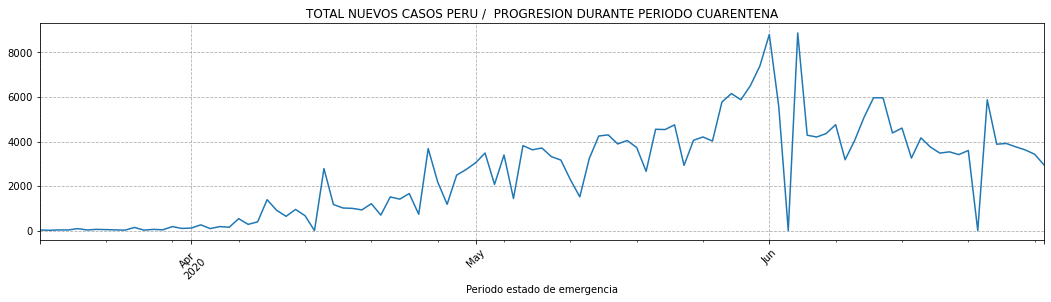

In [51]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS PERU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [52]:
import seaborn as sns
Q1=n_c.quantile(0.25)
Q3=n_c.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France            1487.0
India            18456.0
Peru              4097.5
Spain             2501.5
United States    32008.5
dtype: float64


In [53]:
n_c.shape

(191, 5)

In [54]:
out1=n_c[((n_c< (Q1-1.5*IQR))|(n_c>(Q3 + 2*IQR))).any(axis=1)]

In [55]:
# @joseMaria 
# JMGONB
#$$$$ Se aprecia que Perú tiene picos de hasta más de 8000 casos nuevos pero que concentra en el perido los valores entre 1500 y 4000 casos diarios.

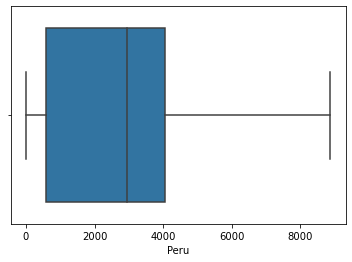

In [56]:
sns.boxplot(x=n_c.loc["2020-03-16":"2020-06-30","Peru"])

In [57]:
t_n_spain=n_c.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain, aqui tenemos otro dato sospechoso de -372 nuevos casos.
t_n_spain

date
2020-03-15    2144.0
2020-03-16    1706.0
2020-03-17    2503.0
2020-03-18    3694.0
2020-03-19    4047.0
               ...  
2020-05-21     482.0
2020-05-22    1787.0
2020-05-23     466.0
2020-05-24     482.0
2020-05-25    -372.0
Name: Spain, Length: 72, dtype: float64

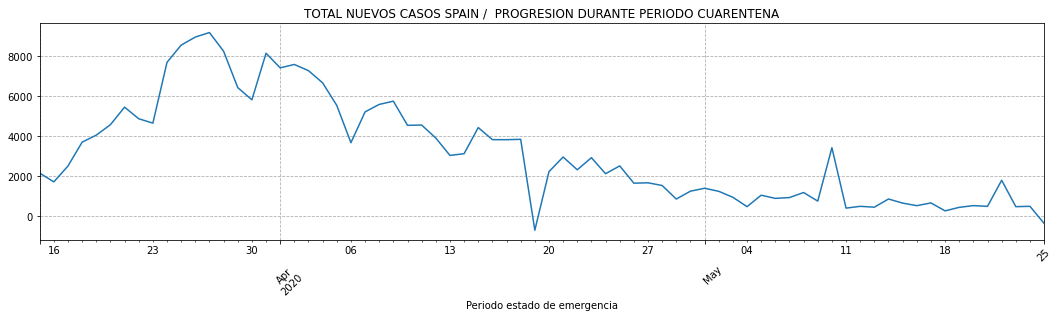

In [58]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS SPAIN /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')                   
#vemos que se han quitado contagiados

In [59]:
t_n_eeuu=n_c.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_n_eeuu

date
2020-04-07    30561.0
2020-04-08    30613.0
2020-04-09    33323.0
2020-04-10    33901.0
2020-04-11    35527.0
               ...   
2020-07-27    55993.0
2020-07-28    56243.0
2020-07-29    61734.0
2020-07-30    74985.0
2020-07-31    68032.0
Name: United States, Length: 116, dtype: float64

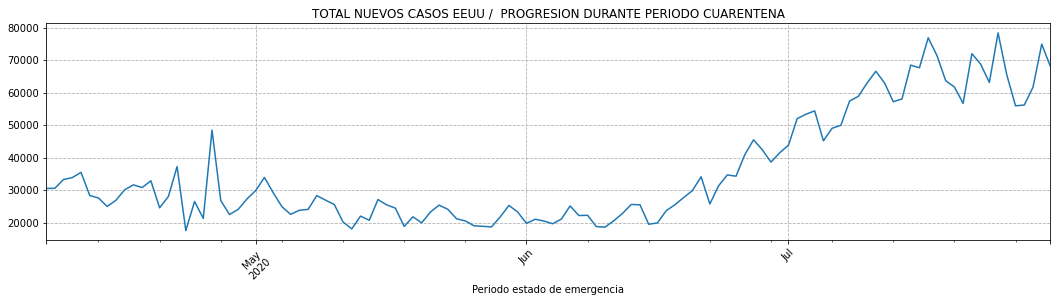

In [60]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_n_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL NUEVOS CASOS EEUU /  PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [61]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON MUERTES TOTALES COVID 19$$$$$$$$$$$$$$$$$$$$$$$

    #*Total de muertes  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*Total de muertes durante el perido de cuarentena en Francia
    #*Total de muertes durante el perido de cuarentena en India
    #*Total de muertes durante el perido de cuarentena en Perú
    #*Total de muertes durante el perido de cuarentena en Spain
    #*Total de muertes durante el perido de cuarentena en EEUU
    #*Total muertos durante los periodos de cuarentena de los 5 paises en una mismo plot.

In [62]:
t_d=df1.pivot_table('total_deaths', index='date',columns='location')
t_d=t_d.fillna(0)


In [63]:
t_d=t_d.loc[~(t_d==0).all(axis=1)]
t_d
#Total de muertes:Eliminamos las filas cuyos valores son 0 en todas sus columnas

location     France    India     Peru    Spain  United States
date                                                         
2020-02-15      1.0      0.0      0.0      0.0            0.0
2020-02-16      1.0      0.0      0.0      0.0            0.0
2020-02-17      1.0      0.0      0.0      0.0            0.0
2020-02-18      1.0      0.0      0.0      0.0            0.0
2020-02-19      1.0      0.0      0.0      0.0            0.0
...             ...      ...      ...      ...            ...
2020-08-10  30324.0  44386.0  21072.0  28576.0       162938.0
2020-08-11  30340.0  45257.0  21276.0  28581.0       163461.0
2020-08-12  30354.0  46091.0  21501.0  28579.0       164537.0
2020-08-13  30371.0  47033.0  21713.0  28605.0       166027.0
2020-08-14  30388.0  48040.0  25648.0      0.0       167110.0

[182 rows x 5 columns]

In [64]:
t_d=t_d.iloc[:-1,:]  #En este caso tomo la penultima posición porque España actualiza la lista un día más tarde y uso tomar datos por posición porque españa pone y quita muertos.
t_d

location     France    India     Peru    Spain  United States
date                                                         
2020-02-15      1.0      0.0      0.0      0.0            0.0
2020-02-16      1.0      0.0      0.0      0.0            0.0
2020-02-17      1.0      0.0      0.0      0.0            0.0
2020-02-18      1.0      0.0      0.0      0.0            0.0
2020-02-19      1.0      0.0      0.0      0.0            0.0
...             ...      ...      ...      ...            ...
2020-08-09  30324.0  43379.0  20844.0  28503.0       162425.0
2020-08-10  30324.0  44386.0  21072.0  28576.0       162938.0
2020-08-11  30340.0  45257.0  21276.0  28581.0       163461.0
2020-08-12  30354.0  46091.0  21501.0  28579.0       164537.0
2020-08-13  30371.0  47033.0  21713.0  28605.0       166027.0

[181 rows x 5 columns]

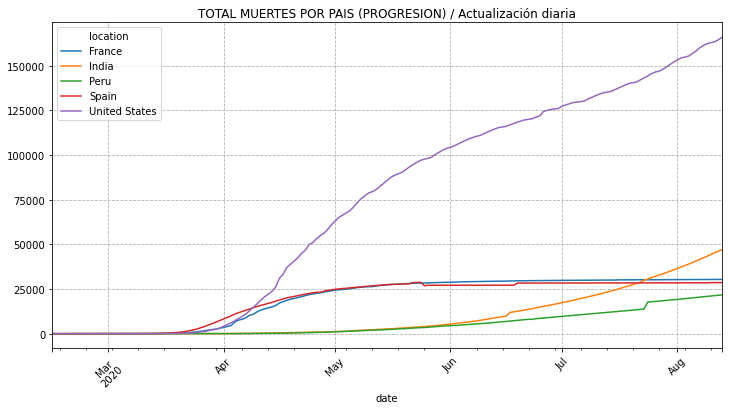

In [65]:
t_d.plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("TOTAL MUERTES POR PAIS (PROGRESION) / Actualización diaria")
plt.grid(linestyle ='dashed')  #Gráfica tendencia total muertes por fechas

In [66]:
total_dead=t_d.iloc[-1,:]
total_dead

location
France            30371.0
India             47033.0
Peru              21713.0
Spain             28605.0
United States    166027.0
Name: 2020-08-13 00:00:00, dtype: float64

In [67]:
total_dead=total_dead.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL MUERTES POR PAIS (Actualización diaria)')

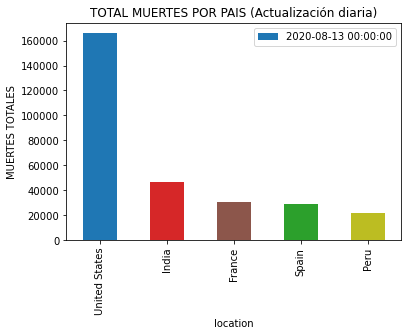

In [68]:
total_dead.plot(kind='bar',color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend( )
plt.ylabel("MUERTES TOTALES")
plt.title("TOTAL MUERTES POR PAIS (Actualización diaria)") #Gráfica total muertes casos por pais.(Responde a la pregunta bloque c numero 7 apartado b)

<function matplotlib.pyplot.show(*args, **kw)>

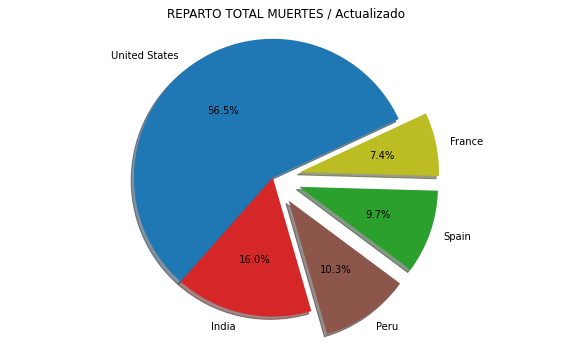

In [69]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
muertes=total_dead
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(muertes,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO TOTAL MUERTES / Actualizado")
pyplot.show

In [70]:
t_d_france=t_d.loc["2020-02-15":"2020-07-10","France"] #periodo del estado de emergencia en Francia
t_d_france

date
2020-02-15        1.0
2020-02-16        1.0
2020-02-17        1.0
2020-02-18        1.0
2020-02-19        1.0
               ...   
2020-07-06    29893.0
2020-07-07    29920.0
2020-07-08    29933.0
2020-07-09    29965.0
2020-07-10    29979.0
Name: France, Length: 147, dtype: float64

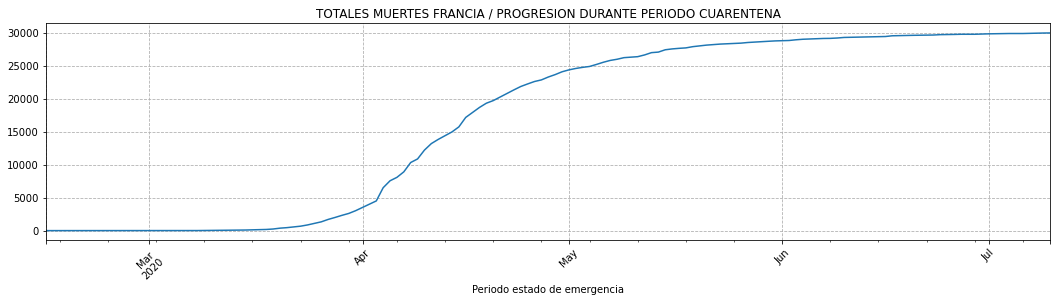

In [71]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_france.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTALES MUERTES FRANCIA / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [72]:
t_d_india=t_d.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
t_d_india

date
2020-03-25        9.0
2020-03-26       13.0
2020-03-27       17.0
2020-03-28       19.0
2020-03-29       25.0
               ...   
2020-07-27    32771.0
2020-07-28    33425.0
2020-07-29    34193.0
2020-07-30    34968.0
2020-07-31    35747.0
Name: India, Length: 129, dtype: float64

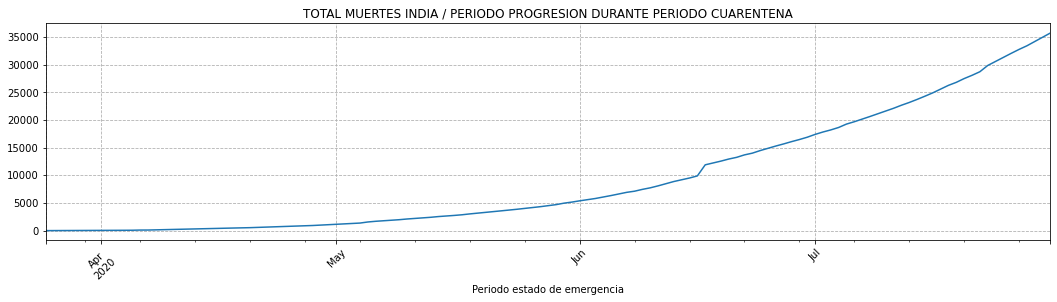

In [73]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_india.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES INDIA / PERIODO PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [74]:
t_d_peru=t_d.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
t_d_peru

date
2020-03-16       0.0
2020-03-17       0.0
2020-03-18       0.0
2020-03-19       0.0
2020-03-20       2.0
               ...  
2020-06-26    8761.0
2020-06-27    8939.0
2020-06-28    9135.0
2020-06-29    9317.0
2020-06-30    9504.0
Name: Peru, Length: 107, dtype: float64

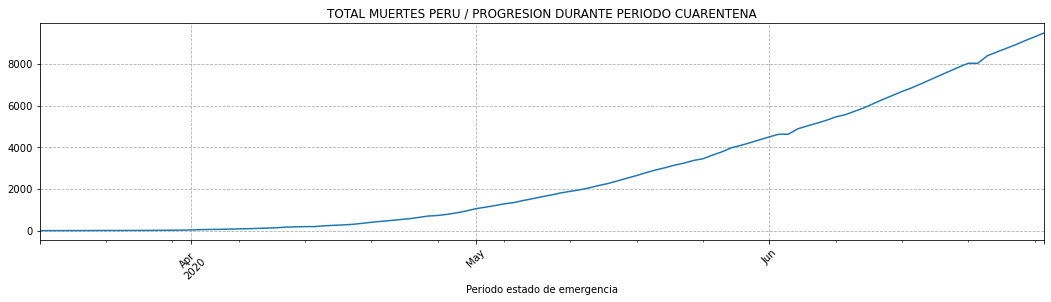

In [75]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_peru.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES PERU / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [76]:
t_d_spain=t_d.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
t_d_spain

date
2020-03-15      136.0
2020-03-16      288.0
2020-03-17      309.0
2020-03-18      491.0
2020-03-19      598.0
               ...   
2020-05-21    27940.0
2020-05-22    28628.0
2020-05-23    28678.0
2020-05-24    28752.0
2020-05-25    26834.0
Name: Spain, Length: 72, dtype: float64

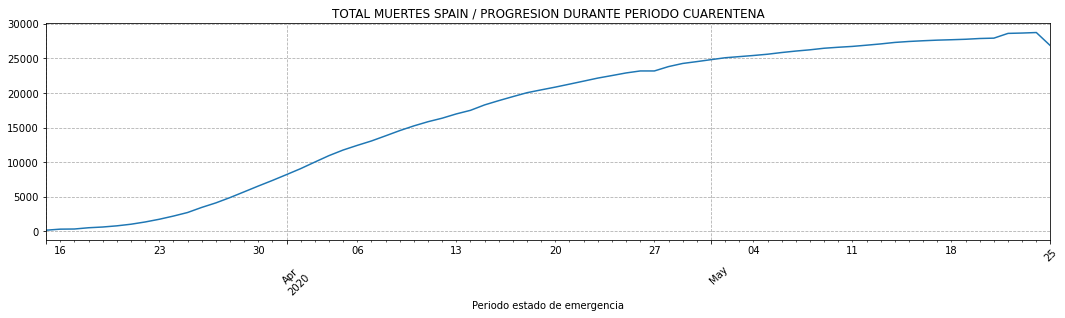

In [77]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_spain.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES SPAIN / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [78]:
t_d_eeuu=t_d.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
t_d_eeuu

date
2020-04-07     10989.0
2020-04-08     12895.0
2020-04-09     14817.0
2020-04-10     16690.0
2020-04-11     18777.0
                ...   
2020-07-27    146935.0
2020-07-28    148011.0
2020-07-29    149256.0
2020-07-30    150713.0
2020-07-31    152070.0
Name: United States, Length: 116, dtype: float64

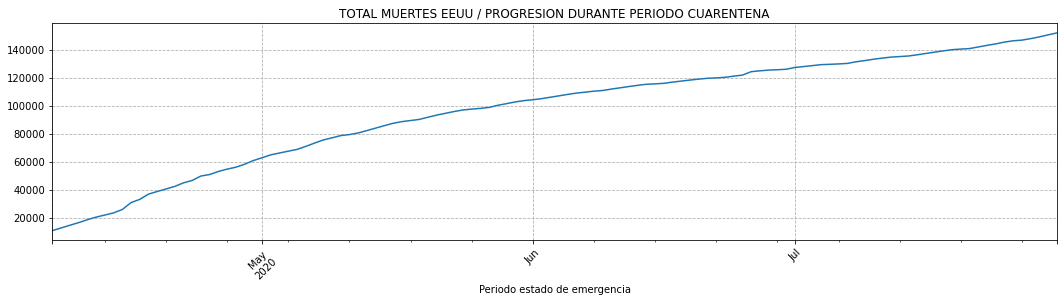

In [79]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
t_d_eeuu.plot()
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("TOTAL MUERTES EEUU / PROGRESION DURANTE PERIODO CUARENTENA")
plt.grid(linestyle ='dashed')

In [80]:
dead1=pd.merge(t_d_france,t_d_peru,on='date',how='outer') #Con el objetivo de sacar los datos de muertos totales de los 5 paises en una misma gráfica y en una misma tabla, voy uniendo tablas porque tengo que unir de dos en dos hasta conseguir tener todo en una

In [81]:
dead2=pd.merge(t_d_india,t_d_spain,on='date',how='outer')

In [82]:
dead2.sort_values(["date"],ascending=True)

India  Spain
date                      
2020-03-15      NaN  136.0
2020-03-16      NaN  288.0
2020-03-17      NaN  309.0
2020-03-18      NaN  491.0
2020-03-19      NaN  598.0
...             ...    ...
2020-07-27  32771.0    NaN
2020-07-28  33425.0    NaN
2020-07-29  34193.0    NaN
2020-07-30  34968.0    NaN
2020-07-31  35747.0    NaN

[139 rows x 2 columns]

In [83]:
dead3=pd.merge(dead1,dead2,on='date',how='outer')

In [84]:
dead3.sort_values(["date"],ascending=True)

France  Peru    India  Spain
date                                    
2020-02-15     1.0   NaN      NaN    NaN
2020-02-16     1.0   NaN      NaN    NaN
2020-02-17     1.0   NaN      NaN    NaN
2020-02-18     1.0   NaN      NaN    NaN
2020-02-19     1.0   NaN      NaN    NaN
...            ...   ...      ...    ...
2020-07-27     NaN   NaN  32771.0    NaN
2020-07-28     NaN   NaN  33425.0    NaN
2020-07-29     NaN   NaN  34193.0    NaN
2020-07-30     NaN   NaN  34968.0    NaN
2020-07-31     NaN   NaN  35747.0    NaN

[168 rows x 4 columns]

In [85]:
dead4=pd.merge(dead3,t_d_eeuu,on='date',how='outer')
dead4=dead4.fillna(0)

In [86]:
dead4.sort_values(["date"],ascending=True)

France  Peru    India  Spain  United States
date                                                   
2020-02-15     1.0   0.0      0.0    0.0            0.0
2020-02-16     1.0   0.0      0.0    0.0            0.0
2020-02-17     1.0   0.0      0.0    0.0            0.0
2020-02-18     1.0   0.0      0.0    0.0            0.0
2020-02-19     1.0   0.0      0.0    0.0            0.0
...            ...   ...      ...    ...            ...
2020-07-27     0.0   0.0  32771.0    0.0       146935.0
2020-07-28     0.0   0.0  33425.0    0.0       148011.0
2020-07-29     0.0   0.0  34193.0    0.0       149256.0
2020-07-30     0.0   0.0  34968.0    0.0       150713.0
2020-07-31     0.0   0.0  35747.0    0.0       152070.0

[168 rows x 5 columns]

In [87]:
dead5=dead4.max()
dead5    #Valores de la última contabilidad realizada en cada país al final de sus periodos de cuarentena

France            29979.0
Peru               9504.0
India             35747.0
Spain             28752.0
United States    152070.0
dtype: float64

In [88]:
dead5=dead5.sort_values(ascending=False)

Text(0.5, 1.0, 'TOTAL MUERTES PERIODO CUARENTENAS ')

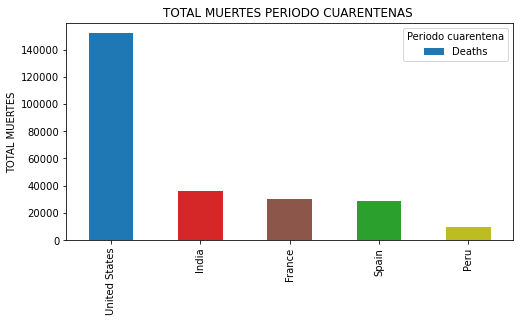

In [89]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,4))

dead5.plot(kind='bar',color=colores_paises,label="Deaths")
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend(title="Periodo cuarentena" )
plt.ylabel("TOTAL MUERTES")
plt.title("TOTAL MUERTES PERIODO CUARENTENAS ")
#GRAFICA DE MUERTES contabilizadas DURANTE EL PERIODO DE CUARETENAS DE LOS PAISES.  LA TABLA RESUME LO QUE OCURRIO EN CADA PAIs

In [90]:
n_d=df1.pivot_table('new_deaths', index='date',columns='location')
n_d=n_d.fillna(0)


In [91]:
  # @joseMaria 
  # JMGONB
  
   #$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON NUEVAS MUERTES COVID 19$$$$$$$$$$$$$$$$$$$$$$$
   
    #*nuevas muertes por día  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual
    #*nuevas muertes durante el perido de cuarentena en Francia
    #*nuevas muertes durante el perido de cuarentena en India
    #*nuevas muertes durante el perido de cuarentena en Perú
    #*nuevas muertes durante el perido de cuarentena en Spain
    #*nuevas muertes durante el perido de cuarentena en EEUU
    #*nuevas muertes durante los periodos de cuarentena de los 5 paises en una mismo plot.

In [92]:
n_d=n_d.loc[~(h==0).all(axis=1)]
n_d
#Nuevas muertes: Eliminamos las filas cuyos valores son 0 en todas sus columnas

location    France   India    Peru  Spain  United States
date                                                    
2020-02-15     1.0     0.0     0.0    0.0            0.0
2020-02-27     1.0     0.0     0.0    0.0            0.0
2020-03-01     0.0     0.0     0.0    0.0            1.0
2020-03-02     0.0     0.0     0.0    0.0            1.0
2020-03-03     1.0     0.0     0.0    0.0            4.0
...            ...     ...     ...    ...            ...
2020-08-10     0.0  1007.0   228.0   73.0          513.0
2020-08-11    16.0   871.0   204.0    5.0          523.0
2020-08-12    14.0   834.0   225.0   -2.0         1076.0
2020-08-13    17.0   942.0   212.0   26.0         1490.0
2020-08-14    17.0  1007.0  3935.0    0.0         1083.0

[169 rows x 5 columns]

In [93]:
n_d

location    France   India    Peru  Spain  United States
date                                                    
2020-02-15     1.0     0.0     0.0    0.0            0.0
2020-02-27     1.0     0.0     0.0    0.0            0.0
2020-03-01     0.0     0.0     0.0    0.0            1.0
2020-03-02     0.0     0.0     0.0    0.0            1.0
2020-03-03     1.0     0.0     0.0    0.0            4.0
...            ...     ...     ...    ...            ...
2020-08-10     0.0  1007.0   228.0   73.0          513.0
2020-08-11    16.0   871.0   204.0    5.0          523.0
2020-08-12    14.0   834.0   225.0   -2.0         1076.0
2020-08-13    17.0   942.0   212.0   26.0         1490.0
2020-08-14    17.0  1007.0  3935.0    0.0         1083.0

[169 rows x 5 columns]

In [94]:
n_d.loc["2020-05-18":"2020-05-30","Spain"]  #outlier Spain

date
2020-05-18      59.0
2020-05-19      69.0
2020-05-20     110.0
2020-05-21      52.0
2020-05-22     688.0
2020-05-23      50.0
2020-05-24      74.0
2020-05-25   -1918.0
2020-05-26     283.0
2020-05-27       1.0
2020-05-28       1.0
2020-05-29       2.0
2020-05-30       4.0
Name: Spain, dtype: float64

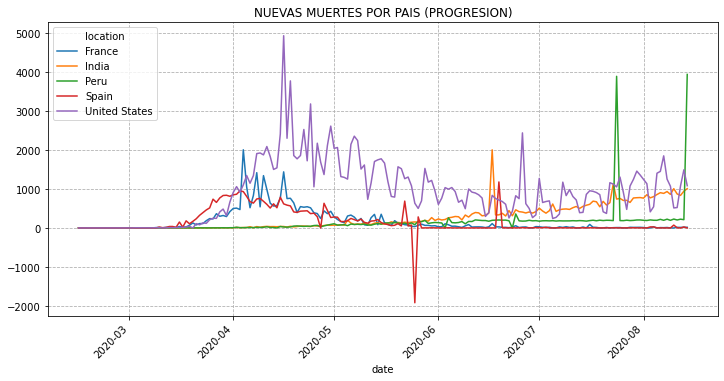

In [95]:
n_d.plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("NUEVAS MUERTES POR PAIS (PROGRESION)")
plt.grid(linestyle ='dashed')
 #Gráfica tendencia total nuevas  muertes por fechas, en el caso de España se aprecia dos outlier entre 22 y 25 de Mayo

In [96]:
n_d.index=pd.to_datetime(n_d.index)  

In [97]:
n_d_1=n_d.resample('M').sum() #agrupo por meses para mejor visualizacion 

In [98]:
n_d_1

location     France    India    Peru    Spain  United States
date                                                        
2020-02-29      2.0      0.0     0.0      0.0            0.0
2020-03-31   3022.0     32.0    24.0   7340.0         3170.0
2020-04-30  21063.0   1042.0   919.0  17203.0        57796.0
2020-05-31   4684.0   4090.0  3428.0   2584.0        42815.0
2020-06-30   1042.0  11729.0  5133.0   1228.0        22359.0
2020-07-31    441.0  18854.0  9517.0     90.0        25930.0
2020-08-31    134.0  12293.0  6627.0    160.0        15040.0

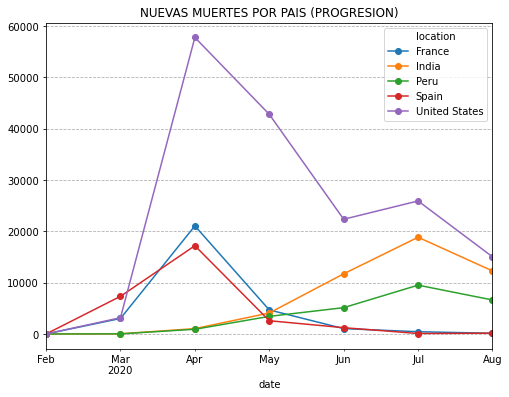

In [99]:
n_d_1.plot(figsize=(8,6),marker = 'o')
plt.xticks(rotation=45)
plt.title("NUEVAS MUERTES POR PAIS (PROGRESION)")
plt.grid(linestyle ='dashed')
#Esta gráfica representa los mismos valores que la gráfica anterior pero agrupados de mes en mes, es importante ver como se enmascaran los outlier de los días de mayo mecionados. Al tomar la gráfica el acumulado del més se diluyen.

In [100]:
total_new_dead=n_d.sum()
total_new_dead

location
France            30388.0
India             48040.0
Peru              25648.0
Spain             28605.0
United States    167110.0
dtype: float64

In [101]:
total_new_dead=total_new_dead.sort_values(ascending=False)

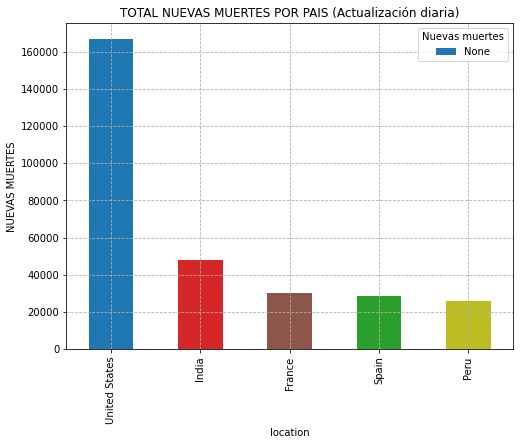

In [102]:
total_new_dead.plot(figsize=(8,6),kind='bar', color=colores_paises)
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.legend(title="Nuevas muertes" )
plt.ylabel("NUEVAS MUERTES")
plt.title("TOTAL NUEVAS MUERTES POR PAIS (Actualización diaria)")
plt.grid(linestyle = 'dashed')  #Gráfica total nuevas muertes valores acumulados a dia actual.


<function matplotlib.pyplot.show(*args, **kw)>

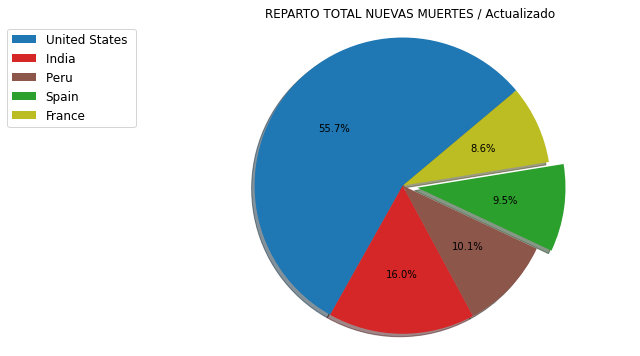

In [103]:
from matplotlib import pyplot
plt.figure(figsize=(8,6))
pais=("United States ","India ","Peru ","Spain","France")
nuevas_muertes=total_new_dead
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.0,0.1,0.0)
pyplot.pie(nuevas_muertes,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=40,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO TOTAL NUEVAS MUERTES / Actualizado")
plt.legend(nuevas_muertes, labels=pais, loc='left center', bbox_to_anchor=(-0.1, 1.),
              fontsize=12)
pyplot.show

In [104]:
n_d

location    France   India    Peru  Spain  United States
date                                                    
2020-02-15     1.0     0.0     0.0    0.0            0.0
2020-02-27     1.0     0.0     0.0    0.0            0.0
2020-03-01     0.0     0.0     0.0    0.0            1.0
2020-03-02     0.0     0.0     0.0    0.0            1.0
2020-03-03     1.0     0.0     0.0    0.0            4.0
...            ...     ...     ...    ...            ...
2020-08-10     0.0  1007.0   228.0   73.0          513.0
2020-08-11    16.0   871.0   204.0    5.0          523.0
2020-08-12    14.0   834.0   225.0   -2.0         1076.0
2020-08-13    17.0   942.0   212.0   26.0         1490.0
2020-08-14    17.0  1007.0  3935.0    0.0         1083.0

[169 rows x 5 columns]

In [105]:
n_d.index=pd.to_datetime(n_d.index) 

In [106]:
n_d_france=n_d.loc["2020-02-15":"2020-07-10","France"]
n_d_france
 #periodo del estado de emergencia en Francia

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-07-06     0.0
2020-07-07    27.0
2020-07-08    13.0
2020-07-09    32.0
2020-07-10    14.0
Name: France, Length: 134, dtype: float64

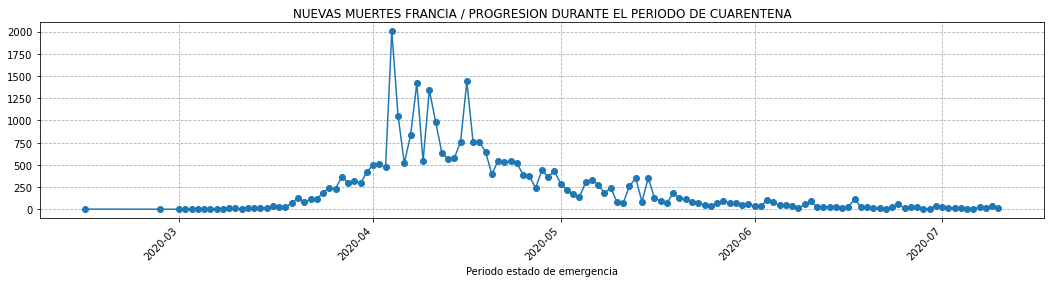

In [107]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_france.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES FRANCIA / PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [108]:
n_d_india=n_d.loc["2020-03-25":"2020-07-31","India"] #periodo del estado de emergencia en India
n_d_india

date
2020-03-25      0.0
2020-03-26      4.0
2020-03-27      4.0
2020-03-28      2.0
2020-03-29      6.0
              ...  
2020-07-27    708.0
2020-07-28    654.0
2020-07-29    768.0
2020-07-30    775.0
2020-07-31    779.0
Name: India, Length: 129, dtype: float64

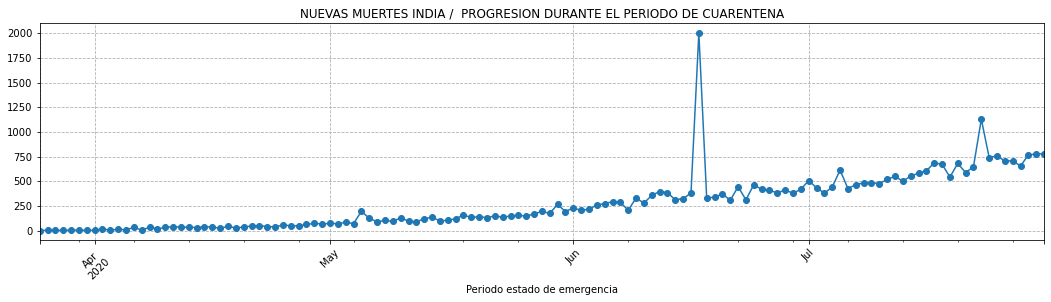

In [109]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_india.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES INDIA /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [110]:
n_d_peru=n_d.loc["2020-03-16":"2020-06-30","Peru"] #periodo del estado de emergencia en Peru
n_d_peru

date
2020-03-16      0.0
2020-03-17      0.0
2020-03-18      0.0
2020-03-19      0.0
2020-03-20      2.0
              ...  
2020-06-26    175.0
2020-06-27    178.0
2020-06-28    196.0
2020-06-29    182.0
2020-06-30    187.0
Name: Peru, Length: 107, dtype: float64

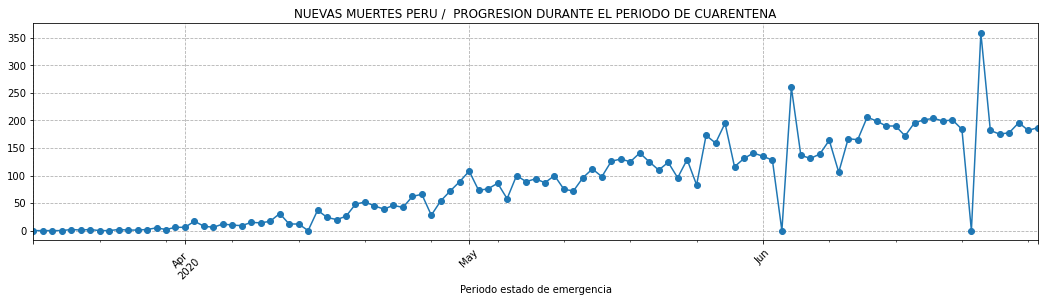

In [111]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_peru.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES PERU /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed')

In [112]:
n_d_spain=n_d.loc["2020-03-15":"2020-05-25","Spain"] #periodo del estado de emergencia en Spain
n_d_spain

date
2020-03-15      15.0
2020-03-16     152.0
2020-03-17      21.0
2020-03-18     182.0
2020-03-19     107.0
               ...  
2020-05-21      52.0
2020-05-22     688.0
2020-05-23      50.0
2020-05-24      74.0
2020-05-25   -1918.0
Name: Spain, Length: 72, dtype: float64

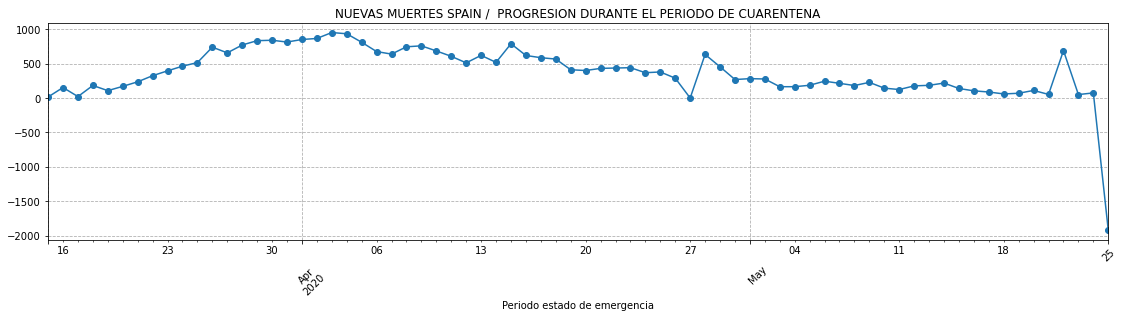

In [113]:
from matplotlib import pyplot as plt
plt.figure(figsize=(19,4))
n_d_spain.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES SPAIN /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle ='dashed') 
#El 25 de mayo los datos son negativos por un supuesto ajuste oficial al contabilizar=outlier

In [114]:
import seaborn as sns
Q1=n_d.quantile(0.25)
Q3=n_d.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France           229.0
India            434.0
Peru             175.0
Spain            275.0
United States    944.0
dtype: float64


In [115]:
import seaborn as sns
Q1=n_d.quantile(0.25)
Q3=n_d.quantile(0.75)
IQR=Q3-Q1
print(IQR)

location
France           229.0
India            434.0
Peru             175.0
Spain            275.0
United States    944.0
dtype: float64


In [116]:
#$$$$$ Plot con el outlier en la estadística de nuevos casos detectado el día 25-05-2020 cuando se restaron 1918 fallecidos.

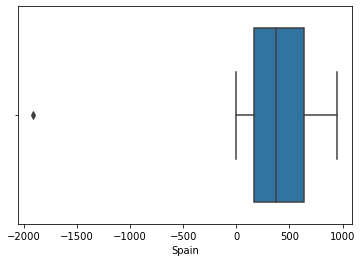

In [117]:
sns.boxplot(x=n_d.loc["2020-03-15":"2020-05-25","Spain"])  

In [118]:
n_d_eeuu=n_d.loc["2020-04-07":"2020-07-31","United States"] #periodo del estado de emergencia en EEUU
n_d_eeuu

date
2020-04-07    1342.0
2020-04-08    1906.0
2020-04-09    1922.0
2020-04-10    1873.0
2020-04-11    2087.0
               ...  
2020-07-27     475.0
2020-07-28    1076.0
2020-07-29    1245.0
2020-07-30    1457.0
2020-07-31    1357.0
Name: United States, Length: 116, dtype: float64

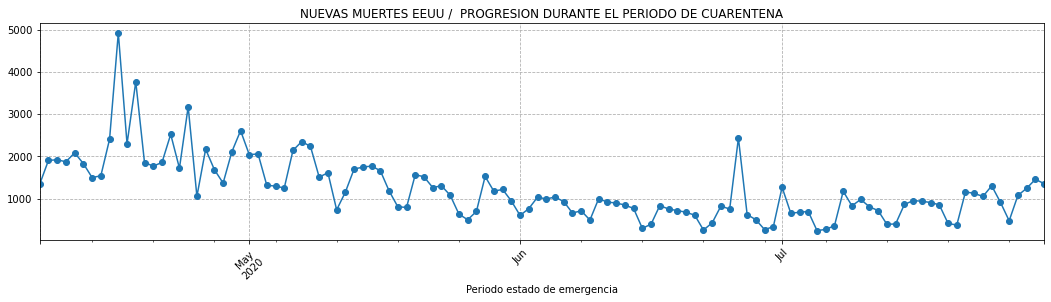

In [119]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
n_d_eeuu.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Periodo estado de emergencia")
plt.title("NUEVAS MUERTES EEUU /  PROGRESION DURANTE EL PERIODO DE CUARENTENA")
plt.grid(linestyle = 'dashed')


In [120]:
data=pd.merge(n_d_france,n_d_peru,on='date',how='outer')
data.sort_values(["date"],ascending=True)

France  Peru
date                    
2020-02-15     1.0   NaN
2020-02-27     1.0   NaN
2020-03-01     0.0   NaN
2020-03-02     0.0   NaN
2020-03-03     1.0   NaN
...            ...   ...
2020-07-06     0.0   NaN
2020-07-07    27.0   NaN
2020-07-08    13.0   NaN
2020-07-09    32.0   NaN
2020-07-10    14.0   NaN

[134 rows x 2 columns]

In [121]:
data2=pd.merge(n_d_india,n_d_spain,on='date',how='outer')
data2.sort_values(["date"],ascending=True)

India  Spain
date                    
2020-03-15    NaN   15.0
2020-03-16    NaN  152.0
2020-03-17    NaN   21.0
2020-03-18    NaN  182.0
2020-03-19    NaN  107.0
...           ...    ...
2020-07-27  708.0    NaN
2020-07-28  654.0    NaN
2020-07-29  768.0    NaN
2020-07-30  775.0    NaN
2020-07-31  779.0    NaN

[139 rows x 2 columns]

In [122]:
data3=pd.merge(data,data2,on='date',how='outer')
data3.sort_values(["date"],ascending=True)

France  Peru  India  Spain
date                                  
2020-02-15     1.0   NaN    NaN    NaN
2020-02-27     1.0   NaN    NaN    NaN
2020-03-01     0.0   NaN    NaN    NaN
2020-03-02     0.0   NaN    NaN    NaN
2020-03-03     1.0   NaN    NaN    NaN
...            ...   ...    ...    ...
2020-07-27     NaN   NaN  708.0    NaN
2020-07-28     NaN   NaN  654.0    NaN
2020-07-29     NaN   NaN  768.0    NaN
2020-07-30     NaN   NaN  775.0    NaN
2020-07-31     NaN   NaN  779.0    NaN

[155 rows x 4 columns]

In [123]:
data4=pd.merge(data3,n_d_eeuu,on='date',how='outer')
data4=data4.fillna(0)

In [124]:
data4=data4.sort_values(["date"],ascending=True)
data4

France  Peru  India  Spain  United States
date                                                 
2020-02-15     1.0   0.0    0.0    0.0            0.0
2020-02-27     1.0   0.0    0.0    0.0            0.0
2020-03-01     0.0   0.0    0.0    0.0            0.0
2020-03-02     0.0   0.0    0.0    0.0            0.0
2020-03-03     1.0   0.0    0.0    0.0            0.0
...            ...   ...    ...    ...            ...
2020-07-27     0.0   0.0  708.0    0.0          475.0
2020-07-28     0.0   0.0  654.0    0.0         1076.0
2020-07-29     0.0   0.0  768.0    0.0         1245.0
2020-07-30     0.0   0.0  775.0    0.0         1457.0
2020-07-31     0.0   0.0  779.0    0.0         1357.0

[155 rows x 5 columns]

In [125]:
data5=data4.sum()
data5

France            29979.0
Peru               9504.0
India             35738.0
Spain             26713.0
United States    142423.0
dtype: float64

In [126]:
data5=data5.sort_values(ascending=False)

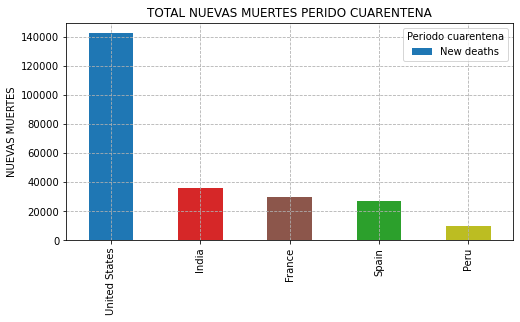

In [127]:
from matplotlib import pyplot as plt
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.figure(figsize=(8,4))
data5.plot(kind='bar',color=colores_paises,label="New deaths")
plt.legend(title="Periodo cuarentena")
plt.ylabel("NUEVAS MUERTES")
plt.title("TOTAL NUEVAS MUERTES PERIDO CUARENTENA")
plt.grid(linestyle = 'dashed')

#GRAFICA DE NUEVAS MUERTES PRODUCIDAS DURANTE EL PERIODO DE CUARETENAS DE LOS PAISES. EN LA TABLA RESUME LO QUE OCURRIO EN CADA PAIS 


In [128]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS CON RECUPERACIONES DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

 #*Total de recuperaciones por día  Covid 19 en los 5 paises seleccionados. Datos que se van actualizando a la fecha actual

In [129]:
total_cas

location
United States    5197148.0
India            2396637.0
Peru              498555.0
Spain             337334.0
France            206696.0
Name: 2020-08-13 00:00:00, dtype: float64

In [130]:
total_dead

location
United States    166027.0
India             47033.0
France            30371.0
Spain             28605.0
Peru              21713.0
Name: 2020-08-13 00:00:00, dtype: float64

In [131]:
recuperados=total_cas-total_dead
recuperados

location
France            176325.0
India            2349604.0
Peru              476842.0
Spain             308729.0
United States    5031121.0
Name: 2020-08-13 00:00:00, dtype: float64

In [132]:
recuperados=recuperados.sort_values(ascending=False)

Text(0.5, 1.0, 'RECUPERACIONES TOTALES')

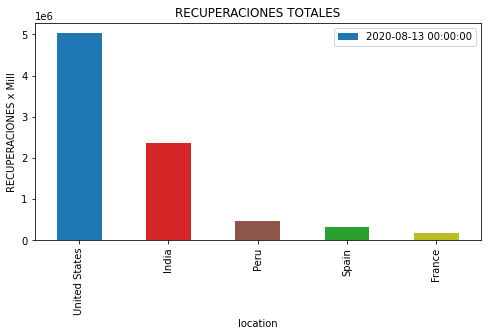

In [133]:
from matplotlib import pyplot as plt
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
plt.figure(figsize=(8,4))
recuperados.plot(kind='bar',color=colores_paises)
plt.legend(loc=2, fontsize = 'xx-small')
plt.legend()
plt.ylabel("RECUPERACIONES x Mill")
plt.title("RECUPERACIONES TOTALES")


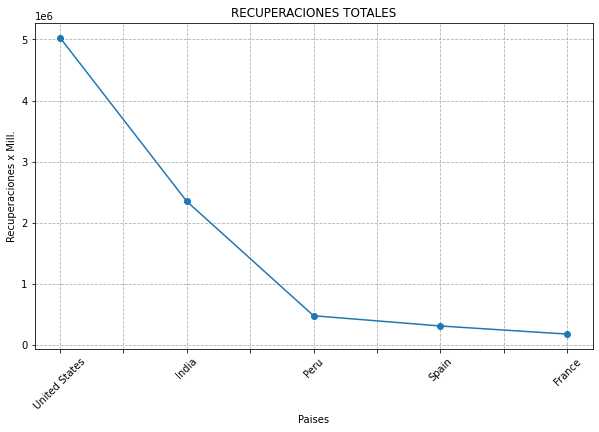

In [134]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
recuperados.plot(marker = 'o')
plt.xticks(rotation=45)
plt.xlabel("Paises")
plt.ylabel("Recuperaciones x Mill.")
plt.title("RECUPERACIONES TOTALES")
plt.grid(linestyle = 'dashed')

In [135]:
x=recuperados.sum()
x=int(x)
x


8342621

<function matplotlib.pyplot.show(*args, **kw)>

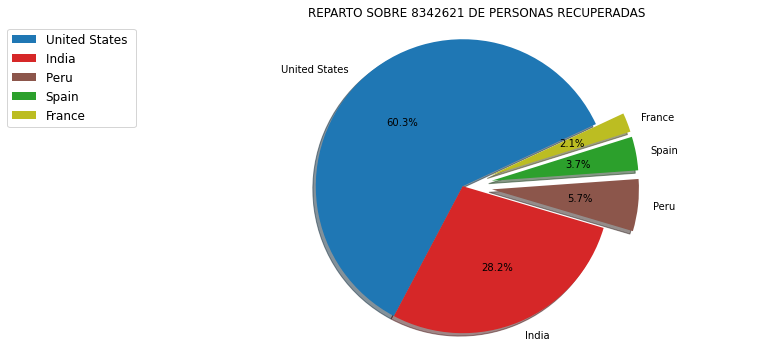

In [136]:
from matplotlib import pyplot
plt.figure(figsize=(10,6))
pais=("United States ","India ","Peru ","Spain","France")
recuperacion=recuperados
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
desfase=(0.0,0.0,0.2,0.2,0.2)
pyplot.pie(recuperacion,labels=pais,colors=colores_paises,autopct="%1.1f%%",shadow=True,startangle=25,explode=desfase)
pyplot.axis("equal")
pyplot.title("REPARTO SOBRE "+str(x)+" DE PERSONAS RECUPERADAS")
plt.legend(recuperacion, labels=pais, loc='left center', bbox_to_anchor=(-0.1, 1.),
              fontsize=12)
pyplot.show

In [137]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS RELACIONADOS TOTAL CASOS VS TOTAL MUERTES EN LOS 5 PAISES $$$$$$$$$$$$$$$$$$$$$$$

 #*Total de casos actualizado y comparativa con total muertes. diagrama de barras con los 5 paises.

In [138]:
total_cas_total_dead=pd.merge(total_cas,total_dead,on='location',how='outer')
total_cas_total_dead=total_cas_total_dead.fillna(0)

In [139]:
total_cas_total_dead.columns=["Total casos","Total muertes"]

In [140]:
total_cas_total_dead

Total casos  Total muertes
location                                 
United States    5197148.0       166027.0
India            2396637.0        47033.0
Peru              498555.0        21713.0
Spain             337334.0        28605.0
France            206696.0        30371.0

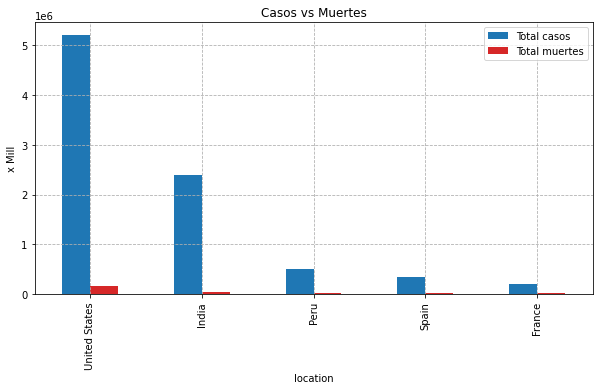

In [141]:
from matplotlib import pyplot as plt
import numpy as np
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
total_cas_total_dead.plot(figsize=(10,5),kind='bar',color=colores_paises)
plt.legend()
plt.grid(linestyle = 'dashed')
plt.ylabel("x Mill")
plt.title("Casos vs Muertes")
plt.show()

In [142]:
#$$$$ Diagrama dispersión relación infecciones con muertes en los cinco paises$$$$$

In [143]:
total_cas_total_dead

Total casos  Total muertes
location                                 
United States    5197148.0       166027.0
India            2396637.0        47033.0
Peru              498555.0        21713.0
Spain             337334.0        28605.0
France            206696.0        30371.0

<function matplotlib.pyplot.show(*args, **kw)>

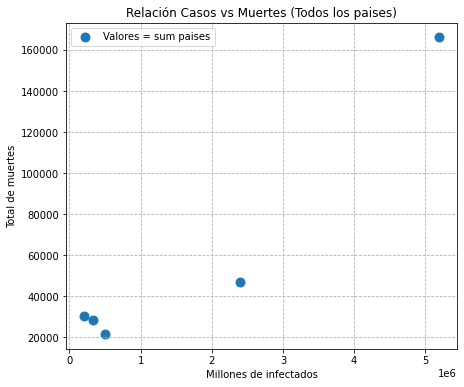

In [144]:

import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(7,6))
my_scatter_plot=ax.scatter(total_cas_total_dead["Total casos"],total_cas_total_dead["Total muertes"],s=80, label="Valores = sum paises")
plt.grid(linestyle = 'dashed')
plt.ylabel("Total de muertes")
plt.xlabel("Millones de infectados")
plt.title("Relación Casos vs Muertes (Todos los paises)")
plt.legend()
plt.show

#Lo interpretamos que en el pais que ha tenido casi 5.000.000 de infectados se corresponde con casí 163.000 muertes

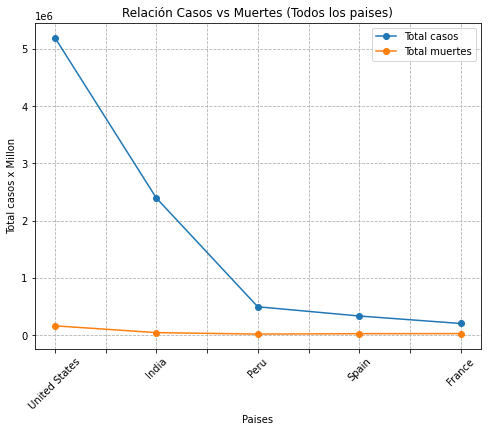

In [145]:
from matplotlib import pyplot as plt
total_cas_total_dead.plot(marker = 'o',figsize=(8,6))
plt.xticks(rotation=45)
plt.xlabel("Paises")
plt.ylabel("Total casos x Millon")
plt.title("Relación Casos vs Muertes (Todos los paises)")
plt.grid(linestyle = 'dashed')

In [146]:

# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS MOSTRANDO LINEAS VERTICALES QUE DELIMITAN PERIODOS DE CUARENTENAS $$$$$$$$$$$$$$$$$$$$$$$

In [147]:
fr=n_d.iloc[:,0]
fr

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-08-10     0.0
2020-08-11    16.0
2020-08-12    14.0
2020-08-13    17.0
2020-08-14    17.0
Name: France, Length: 169, dtype: float64

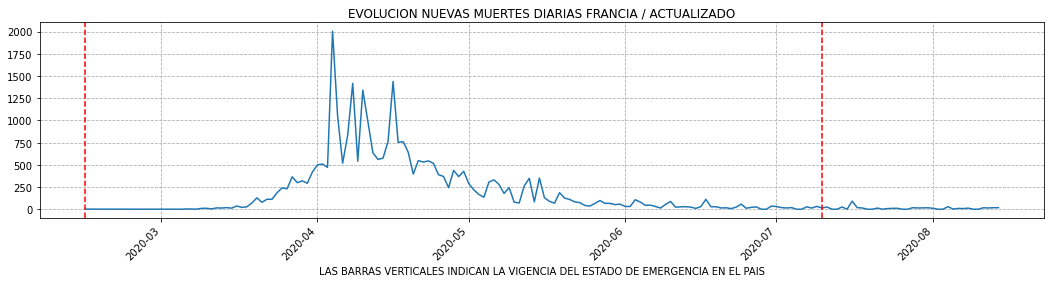

In [148]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
fr.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS FRANCIA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-02-15 ","2020-07-10 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [149]:
ind=n_d.iloc[:,1]
ind

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-10    1007.0
2020-08-11     871.0
2020-08-12     834.0
2020-08-13     942.0
2020-08-14    1007.0
Name: India, Length: 169, dtype: float64

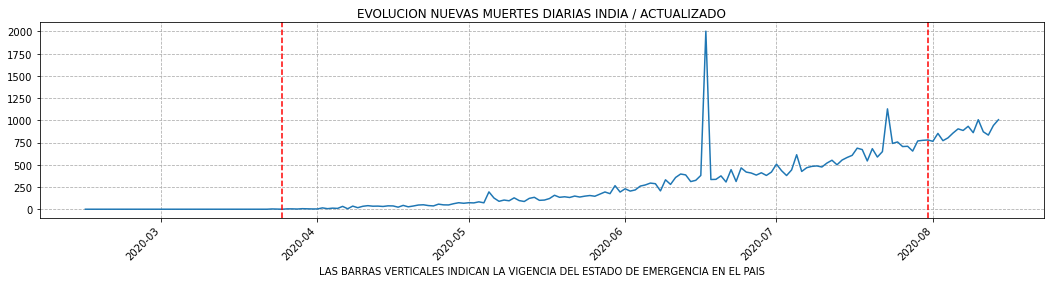

In [150]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
ind.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS INDIA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-25 ","2020-07-31 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [151]:
per=n_d.iloc[:,2]
per

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-10     228.0
2020-08-11     204.0
2020-08-12     225.0
2020-08-13     212.0
2020-08-14    3935.0
Name: Peru, Length: 169, dtype: float64

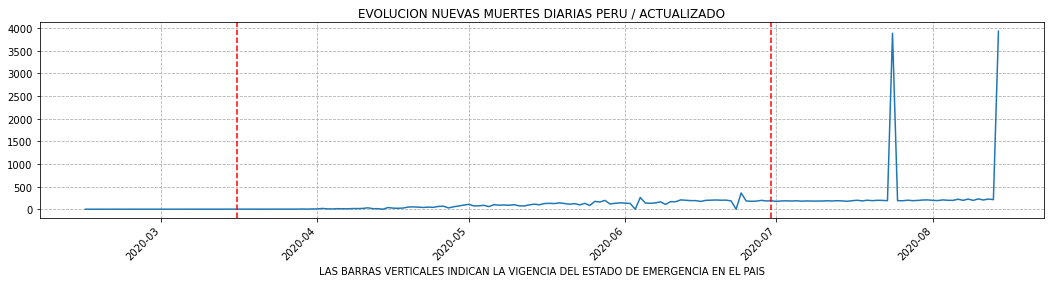

In [152]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
per.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS PERU / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-16 ","2020-06-30 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [153]:
esp=n_d.iloc[:,3]
esp

date
2020-02-15     0.0
2020-02-27     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
              ... 
2020-08-10    73.0
2020-08-11     5.0
2020-08-12    -2.0
2020-08-13    26.0
2020-08-14     0.0
Name: Spain, Length: 169, dtype: float64

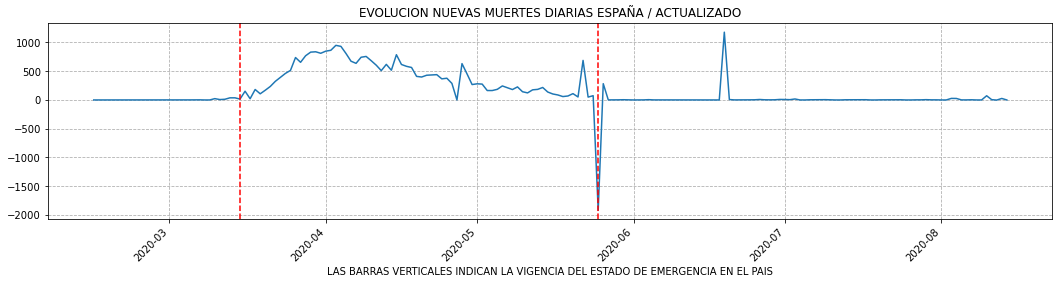

In [154]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
esp.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS ESPAÑA / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-03-15 ","2020-05-25 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")


In [155]:
eu=n_d.iloc[:,4]
eu

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       1.0
2020-03-02       1.0
2020-03-03       4.0
               ...  
2020-08-10     513.0
2020-08-11     523.0
2020-08-12    1076.0
2020-08-13    1490.0
2020-08-14    1083.0
Name: United States, Length: 169, dtype: float64

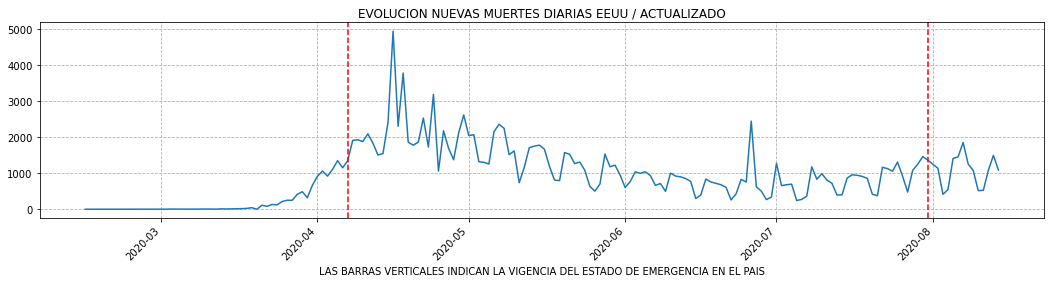

In [156]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,4))
eu.plot()
plt.xticks(rotation=45)
plt.xlabel("LAS BARRAS VERTICALES INDICAN LA VIGENCIA DEL ESTADO DE EMERGENCIA EN EL PAIS")
plt.title("EVOLUCION NUEVAS MUERTES DIARIAS EEUU / ACTUALIZADO")
plt.grid(linestyle ='dashed')
xposition=["2020-04-07 ","2020-07-31 "]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [157]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS DE PORCENTAJES DE MUERTES Y RECUPERADOS  VS CASOS TOTALES DE CASOS COVID 19$$$$$$$$$$$$$$$$$$$$$$$

In [158]:
porct_1=total_cas_total_dead

In [159]:
porct_1

Total casos  Total muertes
location                                 
United States    5197148.0       166027.0
India            2396637.0        47033.0
Peru              498555.0        21713.0
Spain             337334.0        28605.0
France            206696.0        30371.0

In [160]:
recuperacion

location
United States    5031121.0
India            2349604.0
Peru              476842.0
Spain             308729.0
France            176325.0
Name: 2020-08-13 00:00:00, dtype: float64

In [161]:
porcentaje=pd.merge(left=porct_1,right=recuperacion,how="inner",on="location")


In [162]:
porcentaje.columns=["Total casos","Total muertes","Total recuperaciones"]

In [163]:
porcentaje

Total casos  Total muertes  Total recuperaciones
location                                                       
United States    5197148.0       166027.0             5031121.0
India            2396637.0        47033.0             2349604.0
Peru              498555.0        21713.0              476842.0
Spain             337334.0        28605.0              308729.0
France            206696.0        30371.0              176325.0

In [164]:
porcentaje1=porcentaje.iloc[:,0]

In [165]:
porcentaje1

location
United States    5197148.0
India            2396637.0
Peru              498555.0
Spain             337334.0
France            206696.0
Name: Total casos, dtype: float64

In [166]:
porcentaje2=porcentaje.iloc[:,1]

In [167]:
porcentaje2

location
United States    166027.0
India             47033.0
Peru              21713.0
Spain             28605.0
France            30371.0
Name: Total muertes, dtype: float64

In [168]:
porcentaje3=porcentaje.iloc[:,2]

In [169]:
porcentaje_muertes_casos=porcentaje2*100/porcentaje1

In [170]:
porcentaje_muertes_casos
porcentaje_muertes_casos.round(2)

location
United States     3.19
India             1.96
Peru              4.36
Spain             8.48
France           14.69
dtype: float64

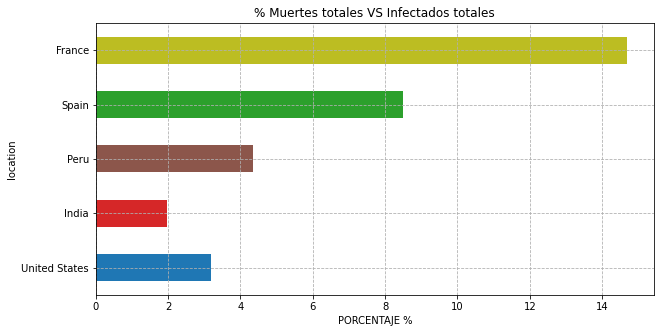

In [171]:
from matplotlib import pyplot as plt
import numpy as np
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
fig=plt.figure
porcentaje_muertes_casos.plot(figsize=(10,5),kind='barh',color=colores_paises)
plt.title("% Muertes totales VS Infectados totales")
plt.grid(linestyle ='dashed')
plt.xlabel("PORCENTAJE %")
plt.show()


In [172]:
porcentaje_recuperados_casos=porcentaje3*100/porcentaje1

In [173]:
porcentaje_recuperados_casos
porcentaje_recuperados_casos.round(2)

location
United States    96.81
India            98.04
Peru             95.64
Spain            91.52
France           85.31
dtype: float64

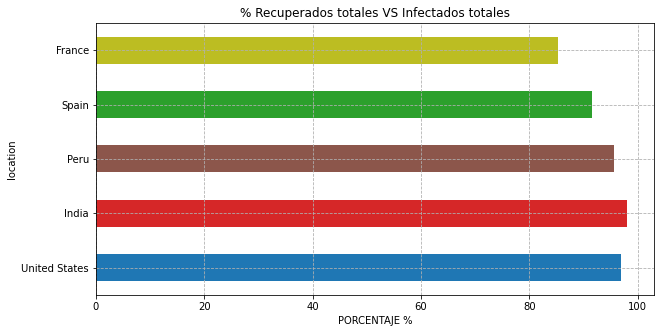

In [174]:
from matplotlib import pyplot as plt
import numpy as np
colores_paises = ["#1f77b4","#d62728","#8c564b","#2ca02c","#bcbd22"]
fig=plt.figure
porcentaje_recuperados_casos.plot(figsize=(10,5),kind='barh',color=colores_paises)
plt.title("% Recuperados totales VS Infectados totales")
plt.grid(linestyle ='dashed')
plt.xlabel("PORCENTAJE %")
plt.show()

In [175]:
# @joseMaria 
# JMGONB

#$$$$$$$$$$$$$$$$ TABLAS Y PLOTS MUERTES DIARIAS DE CADA PAIS CON UN COLOR EN TENDENCIA ESCENDENTE Y OTRO EN TENDENCIA DESCENDENTE#   $$$$$$$$$$$$$$$$$$$$$$$
#Muestro en un primer  gráfico el periodo de cada pais desde 15-02-20 hasta fecha actual para ver cuando comenzó a subir y luego a bajar-
#En un segundo gráfico hago la muestra de la curva de ese perido con diferentes colores.

In [176]:
curva_france=n_d.iloc[:,0]
curva_france
#Sacamos todos los datos para indagar en que momento se produce una tendencia descendenta de manera consolidada.

date
2020-02-15     1.0
2020-02-27     1.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     1.0
              ... 
2020-08-10     0.0
2020-08-11    16.0
2020-08-12    14.0
2020-08-13    17.0
2020-08-14    17.0
Name: France, Length: 169, dtype: float64

In [177]:
datos_france=n_d.loc["2020-03-19":"2020-04-30", "France"]
datos_france
 #Se considera que comienza a  subir el 20-03-2020 y después de varios repuntes por encima de 1000 muertes, el 17-04-2020 comienza a bajar la tendencia.

date
2020-03-19      69.0
2020-03-20     128.0
2020-03-21      78.0
2020-03-22     112.0
2020-03-23     112.0
2020-03-24     186.0
2020-03-25     240.0
2020-03-26     231.0
2020-03-27     365.0
2020-03-28     299.0
2020-03-29     319.0
2020-03-30     292.0
2020-03-31     418.0
2020-04-01     499.0
2020-04-02     509.0
2020-04-03     471.0
2020-04-04    2004.0
2020-04-05    1053.0
2020-04-06     518.0
2020-04-07     833.0
2020-04-08    1417.0
2020-04-09     541.0
2020-04-10    1341.0
2020-04-11     987.0
2020-04-12     635.0
2020-04-13     561.0
2020-04-14     574.0
2020-04-15     762.0
2020-04-16    1438.0
2020-04-17     753.0
2020-04-18     761.0
2020-04-19     642.0
2020-04-20     395.0
2020-04-21     547.0
2020-04-22     531.0
2020-04-23     544.0
2020-04-24     516.0
2020-04-25     389.0
2020-04-26     369.0
2020-04-27     242.0
2020-04-28     437.0
2020-04-29     367.0
2020-04-30     427.0
Name: France, dtype: float64

In [178]:

# @joseMaria 
# JMGONB
#$$$$ Francia muertes por día 15-02-2020 a día atual.$$$$$$$

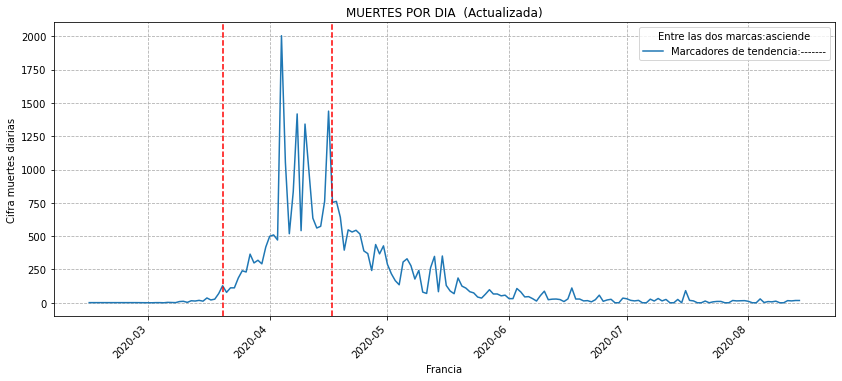

In [179]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_france.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre las dos marcas:asciende")
plt.xlabel("Francia")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-03-20 ","2020-04-17 "] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [180]:
# @joseMaria 
# JMGONB
#$$$$ Francia muertes por día 20-03-2020 a día 17-04-2020. que es el día que sucede una inflexion y comienza a bajar.$$$$$$$

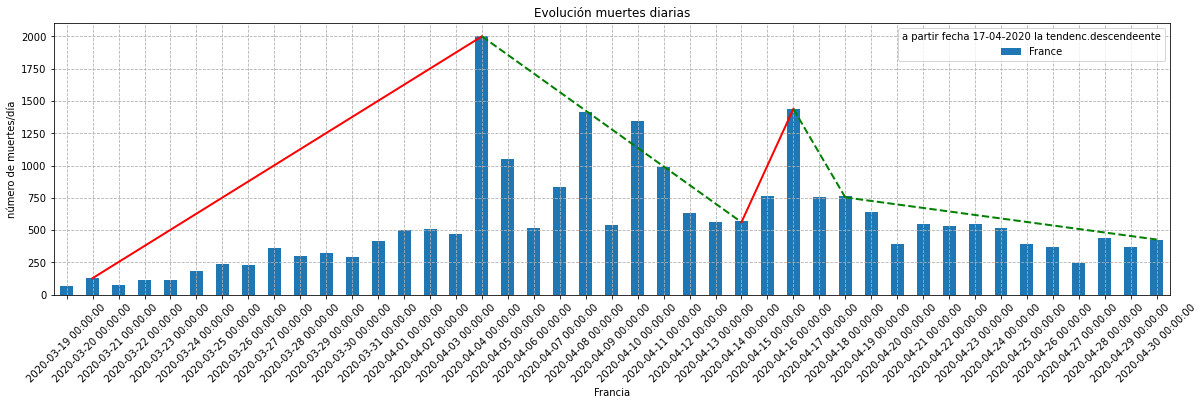

In [181]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
datos_france.plot(kind='bar')
plt.legend(title="a partir fecha 17-04-2020 la tendenc.descendeente")
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Francia")
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.plot ([1 ,16], [ 128,2000 ],lw = 2,color='r')
plt.plot ([16 ,26], [ 2000,561 ],lw = 2,color='g',linestyle="--")
plt.plot ([26 ,28], [561,1438],lw = 2,color='r')
plt.plot ([28 ,30], [1438,753],lw = 2,color='g',linestyle="--")
plt.plot ([30 ,42], [753,427],lw = 2,color='g',linestyle="--")


In [182]:
# @joseMaria 
# JMGONB

#$$$$ India muertes por día 15-02-2020 a día atual.$$$$$$$

In [183]:
curva_india=n_d.iloc[:,1]
curva_india
#Sacamos todos los datos para indagar en que momento se produce una tendencia descendenta de manera consolidada.

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-10    1007.0
2020-08-11     871.0
2020-08-12     834.0
2020-08-13     942.0
2020-08-14    1007.0
Name: India, Length: 169, dtype: float64

In [184]:
datos_india=n_d.loc["2020-04-02":"2020-08-07","India" ] 
datos_india

date
2020-04-02     15.0
2020-04-03      6.0
2020-04-04     12.0
2020-04-05      9.0
2020-04-06     32.0
              ...  
2020-08-03    771.0
2020-08-04    803.0
2020-08-05    857.0
2020-08-06    904.0
2020-08-07    886.0
Name: India, Length: 128, dtype: float64

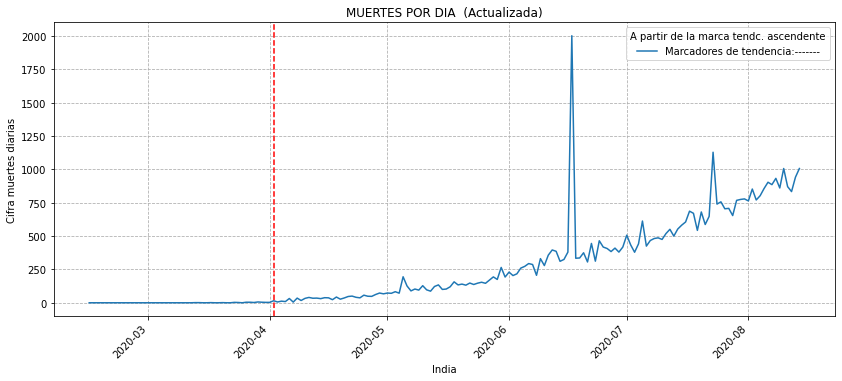

In [185]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_india.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="A partir de la marca tendc. ascendente")
plt.xlabel("India")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-02 "] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")


In [186]:
# @joseMaria 
# JMGONB
#$$$$ India muertes desde el día 02-04-2020  que no han dejado de descender.$$$$$$$

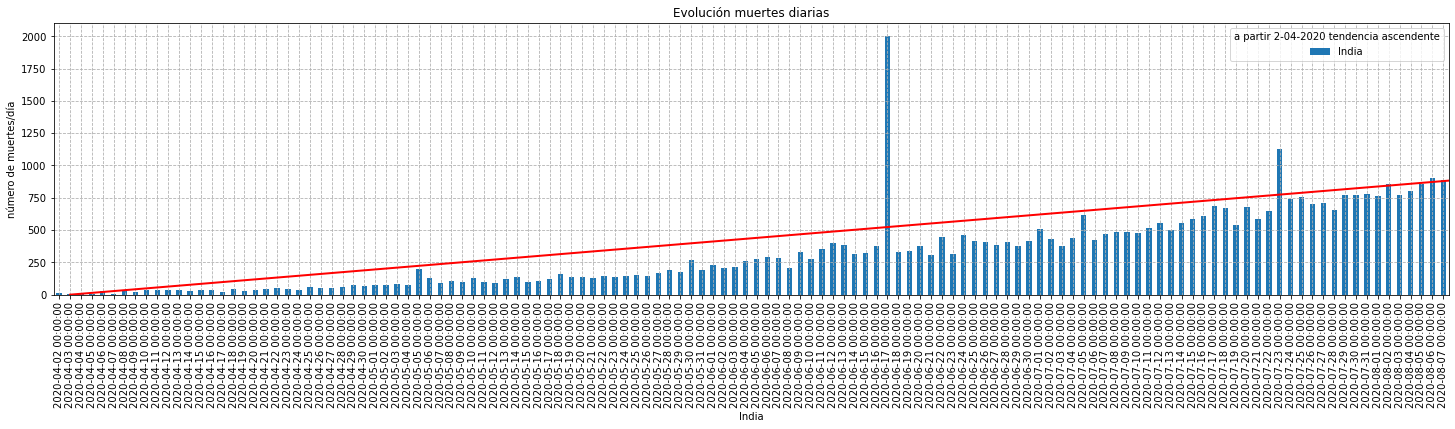

In [187]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_india.plot(kind='bar')
plt.legend(title="a partir 2-04-2020 tendencia ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("India")
plt.plot ([1 ,128], [0,886],lw = 2,color='r')


In [188]:
# @joseMaria 
# JMGONB
#$$$$ Peru muertes por día 15-02-2020 a día atual.$$$$$$$

In [189]:
curva_peru=n_d.iloc[:,2]

In [190]:
curva_peru

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
               ...  
2020-08-10     228.0
2020-08-11     204.0
2020-08-12     225.0
2020-08-13     212.0
2020-08-14    3935.0
Name: Peru, Length: 169, dtype: float64

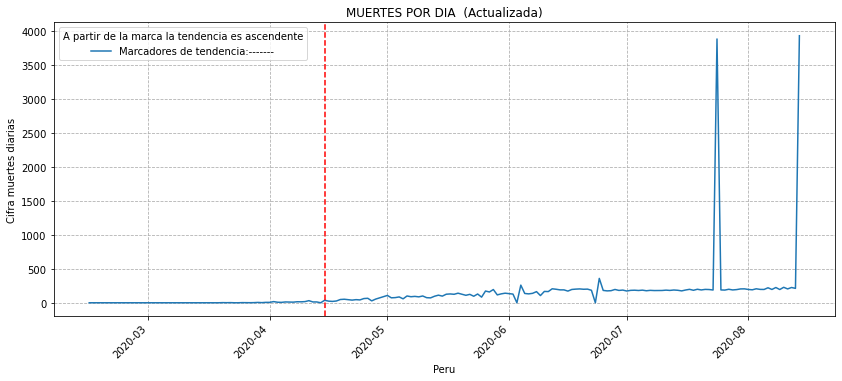

In [191]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_peru.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="A partir de la marca la tendencia es ascendente")
plt.xlabel("Peru")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-15"] 
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [192]:
# @joseMaria 
# JMGONB
#$$$$ Perú muertes desde el día 15-04-2020  que no han dejado de descender hasta el 24-07-2020 fecha en la que tenemos un outlier sospechoso que mostramos en el último plot de este punto..$$$$$$$

In [193]:
datos_peru=n_d.loc["2020-04-15":"2020-08-07","Peru" ] 
datos_peru

date
2020-04-15     37.0
2020-04-16     24.0
2020-04-17     20.0
2020-04-18     26.0
2020-04-19     48.0
              ...  
2020-08-03    206.0
2020-08-04    197.0
2020-08-05    196.0
2020-08-06    221.0
2020-08-07    196.0
Name: Peru, Length: 115, dtype: float64

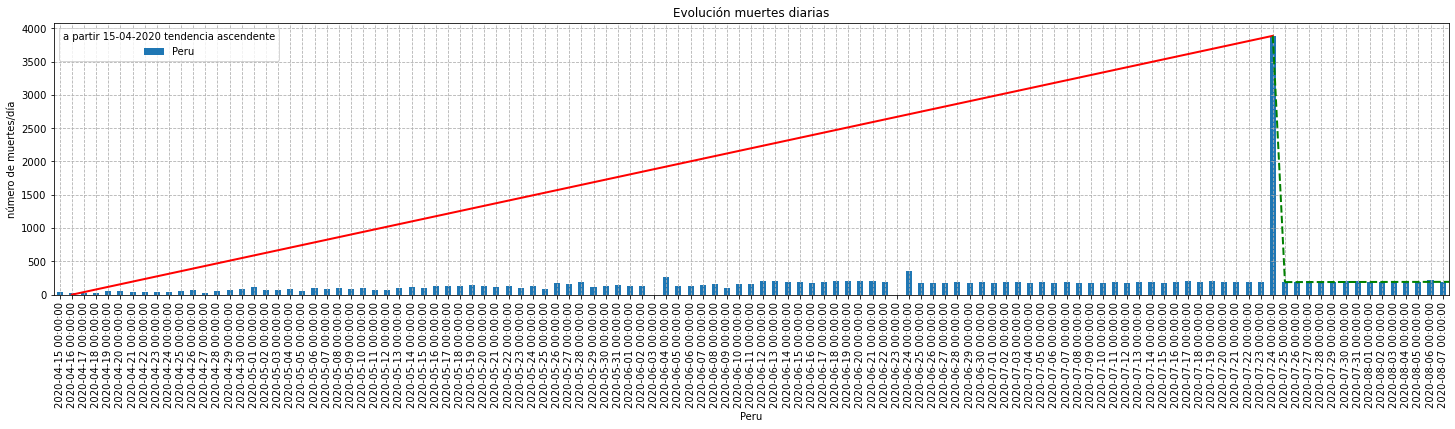

In [194]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_peru.plot(kind='bar')
plt.legend(title="a partir 15-04-2020 tendencia ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("Peru")
plt.plot ([1 ,100], [0,3887],lw = 2,color='r')
plt.plot ([100 ,101], [3887,189],lw = 2,color='g',linestyle="--")
plt.plot ([101 ,128], [189,196],lw = 2,color='g',linestyle="--")

In [195]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Peru---Outlier sospechoso con fecha 24-07-2020 (Muertos en ese dia 3887 personas) $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [196]:
import seaborn as sns
Q1=datos_peru.quantile(0.25)
Q3=datos_peru.quantile(0.75)
IQR=Q3-Q1
print(IQR)

93.5


In [197]:
out2=datos_peru[((datos_peru< (Q1-1.5*IQR))|(datos_peru>(Q3 + 2*IQR))).any(axis=0)]

No handles with labels found to put in legend.


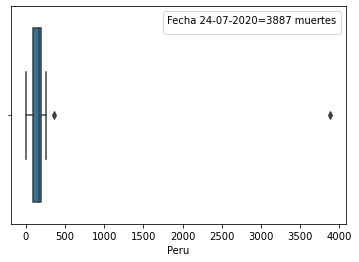

In [198]:
sns.boxplot(x=datos_peru.loc["2020-04-15":"2020-08-07"])
plt.legend(title="Fecha 24-07-2020=3887 muertes")

In [199]:
# @joseMaria 
# JMGONB
#$$$$ España muertes por día 15-02-2020 a día atual.$$$$$$$

In [200]:
curva_españa=n_d.iloc[:,3]
curva_españa

date
2020-02-15     0.0
2020-02-27     0.0
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
              ... 
2020-08-10    73.0
2020-08-11     5.0
2020-08-12    -2.0
2020-08-13    26.0
2020-08-14     0.0
Name: Spain, Length: 169, dtype: float64

In [201]:
datos_españa=n_d.loc["2020-03-15":"2020-06-19","Spain" ] 
datos_españa

date
2020-03-15      15.0
2020-03-16     152.0
2020-03-17      21.0
2020-03-18     182.0
2020-03-19     107.0
               ...  
2020-06-15       0.0
2020-06-16       0.0
2020-06-17       0.0
2020-06-18       0.0
2020-06-19    1179.0
Name: Spain, Length: 97, dtype: float64

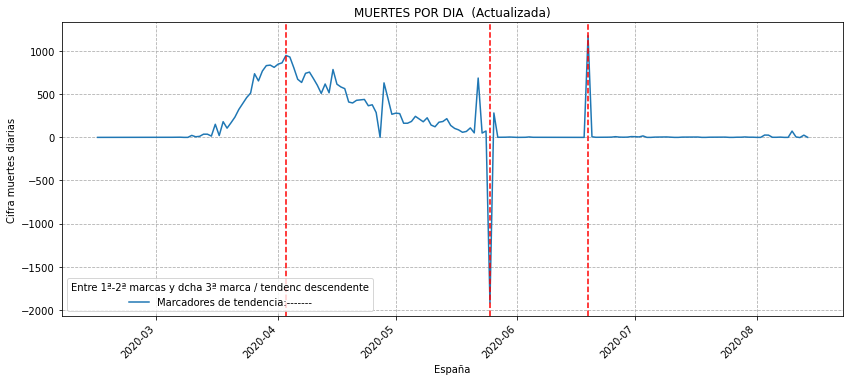

In [202]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_españa.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre 1ª-2ª marcas y dcha 3ª marca / tendenc descendente")
plt.xlabel("España")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-04-03","2020-05-25","2020-06-19"]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [203]:
# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$ España muertes desde el día 15-03-2020  hasta el 19-06-2020. Tenemos un outlier, y dias en los que los datos son sin muertes porque la administración no notificaba cifras actualizadas.$$$$$$$$$$$$$$

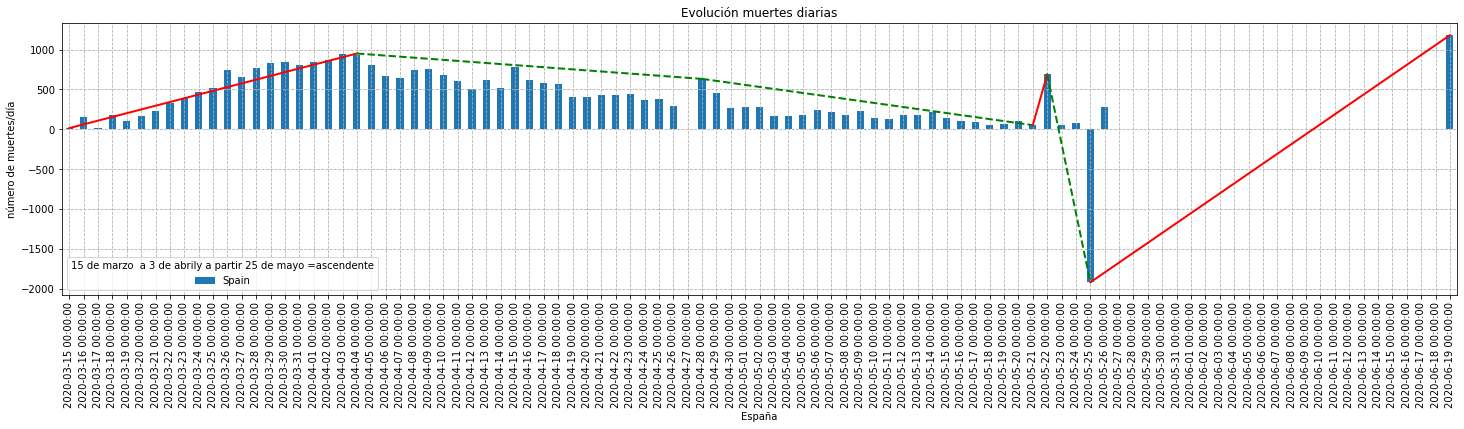

In [204]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_españa.plot(kind='bar')
plt.legend(title="15 de marzo  a 3 de abrily a partir 25 de mayo =ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("España")
plt.plot ([0 ,20], [15,950],lw = 2,color='r')
plt.plot ([20 ,44], [950,632],lw = 2,color='g',linestyle="--")
plt.plot ([44 ,67], [632,52],lw = 2,color='g',linestyle="--")
plt.plot ([67 ,68], [52,688],lw = 2,color='r')
plt.plot ([68 ,71], [688,-1918],lw = 2,color='g',linestyle="--")
plt.plot ([71 ,96], [-1918,1179],lw = 2,color='r')

In [205]:
# @joseMaria 
# JMGONB
#$$$$ EEUU muertes por día 15-02-2020 a día atual.$$$$$$$

In [206]:
curva_EEUU=n_d.iloc[:,4]
curva_EEUU

date
2020-02-15       0.0
2020-02-27       0.0
2020-03-01       1.0
2020-03-02       1.0
2020-03-03       4.0
               ...  
2020-08-10     513.0
2020-08-11     523.0
2020-08-12    1076.0
2020-08-13    1490.0
2020-08-14    1083.0
Name: United States, Length: 169, dtype: float64

In [207]:
datos_EEUU=n_d.loc["2020-03-23":"2020-07-01","United States"]
datos_EEUU					


date
2020-03-23     131.0
2020-03-24     119.0
2020-03-25     211.0
2020-03-26     249.0
2020-03-27     246.0
               ...  
2020-06-27     623.0
2020-06-28     500.0
2020-06-29     265.0
2020-06-30     336.0
2020-07-01    1270.0
Name: United States, Length: 101, dtype: float64

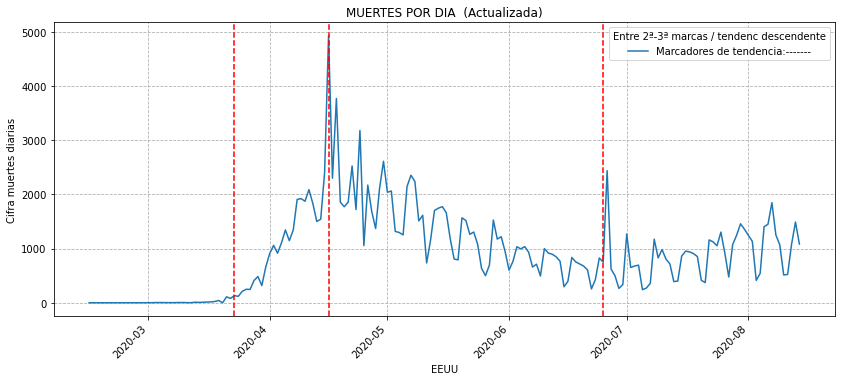

In [208]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,6))
curva_EEUU.plot(label="Marcadores de tendencia:-------")
plt.xticks(rotation=45)
plt.legend(title="Entre 2ª-3ª marcas / tendenc descendente")
plt.xlabel("EEUU")
plt.ylabel("Cifra muertes diarias")
plt.title("MUERTES POR DIA  (Actualizada)")
plt.grid(linestyle = 'dashed')
xposition=["2020-03-23","2020-04-16","2020-06-25"]
for c in xposition:
    plt.axvline(x=c,color="r",linestyle="--")

In [209]:
# @joseMaria 
# JMGONB
#$$$$$$$$$$$$$$ EEUU muertes desde 23-03-2020 a 1-07-2020 /del 3 a 23 de marzo y a partir 25 de junio=ascendiente"

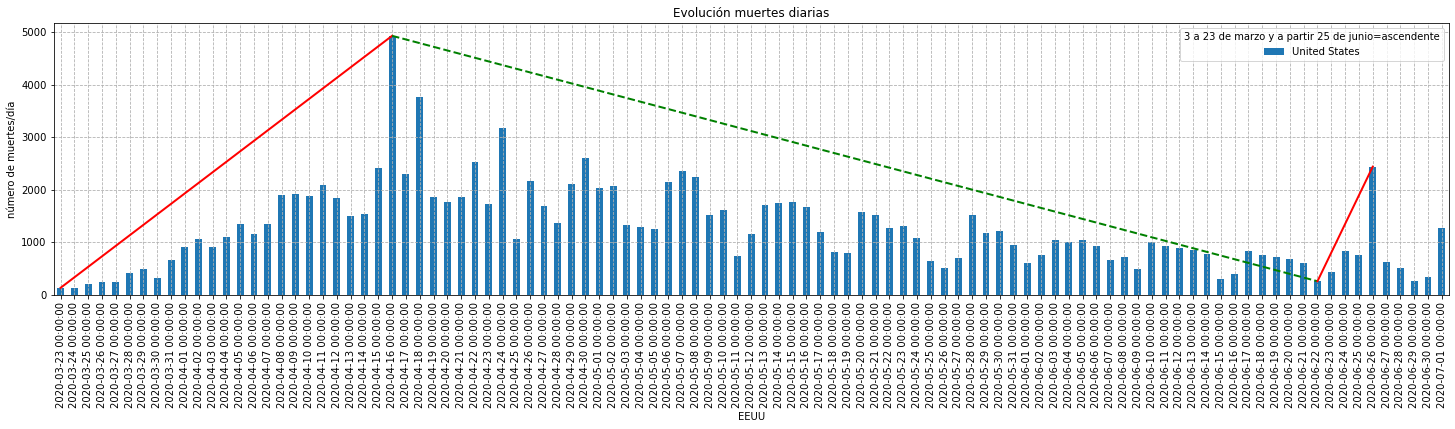

In [210]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,5))
datos_EEUU.plot(kind='bar')
plt.legend(title="3 a 23 de marzo y a partir 25 de junio=ascendente")
plt.xticks()
plt.grid(linestyle ='dashed')
plt.ylabel("número de muertes/día")
plt.title("Evolución muertes diarias")
plt.xlabel("EEUU")
plt.plot ([0 ,24], [131,4928],lw = 2,color='r')
plt.plot ([24 ,91], [4928,256],lw = 2,color='g',linestyle="--")
plt.plot ([91 ,95], [256,2437],lw = 2,color='r')

Total casos  Total muertes
Total casos       1.000000       0.954789
Total muertes     0.954789       1.000000

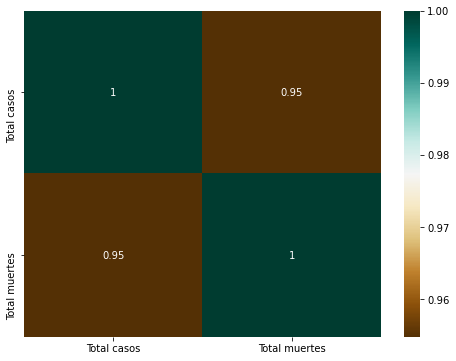

In [211]:
import seaborn as sns
plt.figure(figsize=(8,6))
c=total_cas_total_dead.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [212]:
pop=df1.pivot_table('population_density', index='date',columns='location')
pop=pop.fillna(0)
pop

location     France    India    Peru   Spain  United States
date                                                       
2019-12-31  122.578  450.419   0.000  93.105         35.608
2020-01-01  122.578  450.419   0.000  93.105         35.608
2020-01-02  122.578  450.419   0.000  93.105         35.608
2020-01-03  122.578  450.419   0.000  93.105         35.608
2020-01-04  122.578  450.419   0.000  93.105         35.608
...             ...      ...     ...     ...            ...
2020-08-10  122.578  450.419  25.129  93.105         35.608
2020-08-11  122.578  450.419  25.129  93.105         35.608
2020-08-12  122.578  450.419  25.129  93.105         35.608
2020-08-13  122.578  450.419  25.129  93.105         35.608
2020-08-14  122.578  450.419  25.129   0.000         35.608

[228 rows x 5 columns]

In [213]:
pop=pop.iloc[-2,:] 
pop

location
France           122.578
India            450.419
Peru              25.129
Spain             93.105
United States     35.608
Name: 2020-08-13 00:00:00, dtype: float64

In [214]:
pop1=pd.merge(total_cas_total_dead,pop,on='location',how='outer')
pop1=pop1.fillna(0)


In [215]:
pop1

Total casos  Total muertes  2020-08-13 00:00:00
location                                                      
United States    5197148.0       166027.0               35.608
India            2396637.0        47033.0              450.419
Peru              498555.0        21713.0               25.129
Spain             337334.0        28605.0               93.105
France            206696.0        30371.0              122.578

In [216]:
pop1.columns=["Total casos","Total muertes","Densidad de Poblacion"]
pop1

Total casos  Total muertes  Densidad de Poblacion
location                                                        
United States    5197148.0       166027.0                 35.608
India            2396637.0        47033.0                450.419
Peru              498555.0        21713.0                 25.129
Spain             337334.0        28605.0                 93.105
France            206696.0        30371.0                122.578

Total casos  Total muertes  Densidad de Poblacion
Total casos               1.000000       0.954789               0.052361
Total muertes             0.954789       1.000000              -0.203916
Densidad de Poblacion     0.052361      -0.203916               1.000000

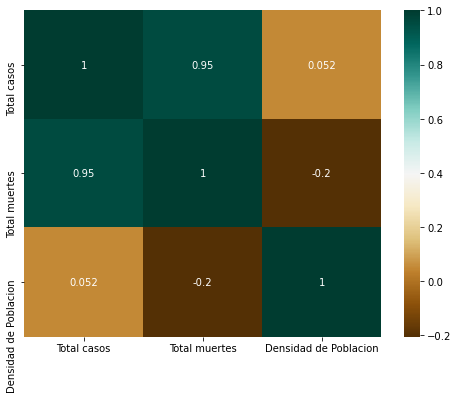

In [217]:
import seaborn as sns
plt.figure(figsize=(8,6))
c=pop1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
#Cómo podemos observar los cuadros con valor 1 son los más fuertemente correlacionados, como es de esperar, a más densidad de población, se dan más casos y mas muertes.

In [218]:
#$$$$$$$$$$$$$$$$$$$$$$$ NUEVOS CONTAGIOS CON UNA FRECUENCIA DE CADA 10 DIAS DURENTE EL PERIODO DE ALARMA DE CADA PAIS $$$$$$$$$$$$

In [219]:
frecuenc_france=t_n_france.resample("10d", label="right").sum()
frecuenc_france

date
2020-02-27        3.0
2020-03-08      599.0
2020-03-18     6020.0
2020-03-28    22522.0
2020-04-07    41323.0
2020-04-17    35728.0
2020-04-27    17908.0
2020-05-07     8853.0
2020-05-17     8952.0
2020-05-27     3360.0
2020-06-06     7165.0
2020-06-16     4776.0
2020-06-26     4128.0
2020-07-06     5612.0
2020-07-16     3134.0
Freq: 10D, Name: France, dtype: float64

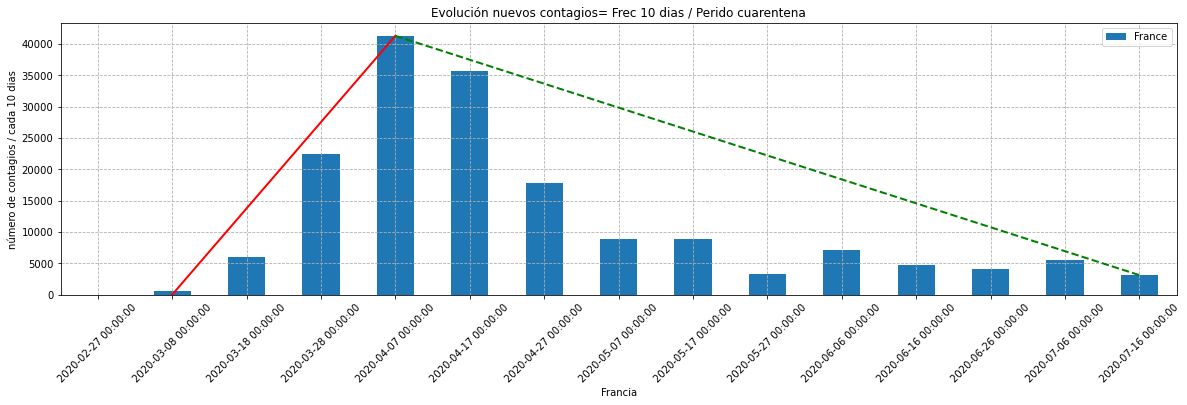

In [220]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
frecuenc_france.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Francia")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([1 ,4], [ 3,41323],lw = 2,color='r')
plt.plot ([4 ,14], [ 41323,3124 ],lw = 2,color='g',linestyle="--")


In [221]:
frecuenc_india=t_n_india.resample("10d", label="right").sum()
frecuenc_india

date
2020-04-04      1809.0
2020-04-14      6851.0
2020-04-24     12241.0
2020-05-04     18587.0
2020-05-14     34301.0
2020-05-24     50820.0
2020-06-03     73605.0
2020-06-13     98829.0
2020-06-23    127747.0
2020-07-03    179359.0
2020-07-13    244912.0
2020-07-23    343362.0
2020-08-02    445955.0
Freq: 10D, Name: India, dtype: float64

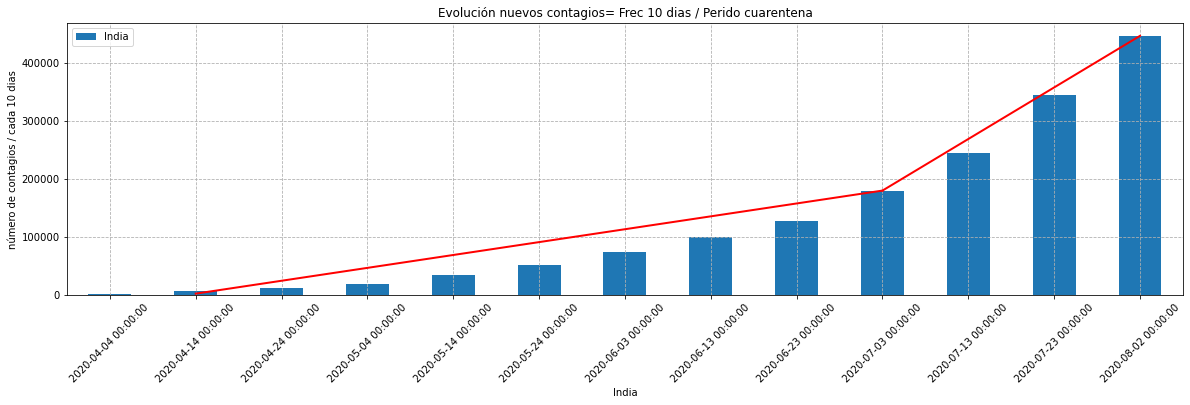

In [222]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
frecuenc_india.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("India")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([1 ,9], [ 1809,179359],lw = 2,color='r')
plt.plot ([9 ,12], [ 179359,445955 ],lw = 2,color='r')

In [223]:
frecuenc_peru=t_n_peru.resample("10d", label="right").sum()
frecuenc_peru

date
2020-03-26      373.0
2020-04-05     1179.0
2020-04-15     5924.0
2020-04-25    13395.0
2020-05-05    25014.0
2020-05-15    30378.0
2020-05-25    39448.0
2020-06-04    54285.0
2020-06-14    50710.0
2020-06-24    34187.0
2020-07-04    27429.0
Freq: 10D, Name: Peru, dtype: float64

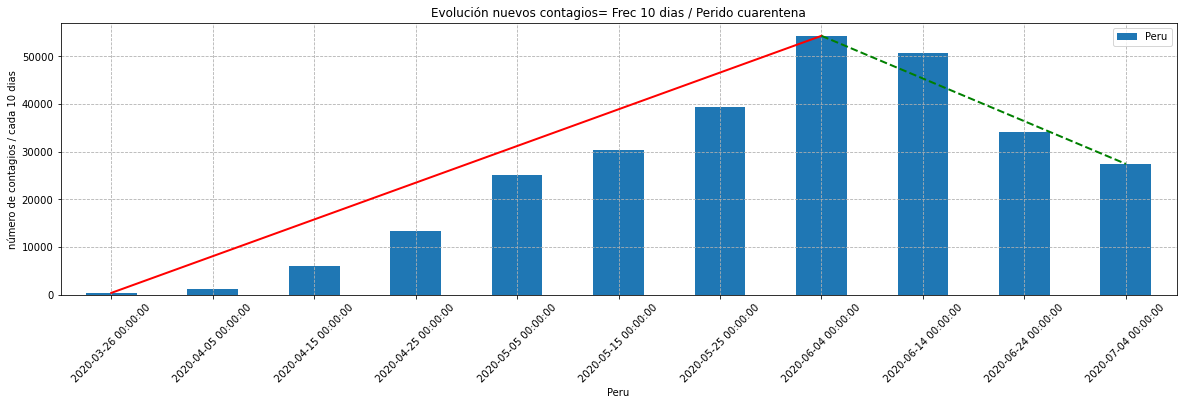

In [224]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
frecuenc_peru.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Peru")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([0 ,7], [ 373,54285],lw = 2,color='r')
plt.plot ([7 ,10], [54285,27429 ],lw = 2,color='g',linestyle="--")

In [225]:
frecuenc_spain=t_n_spain.resample("10d", label="right").sum()
frecuenc_spain

date
2020-03-25    41312.0
2020-04-04    77582.0
2020-04-14    48416.0
2020-04-24    28698.0
2020-05-04    15090.0
2020-05-14     9952.0
2020-05-24     6599.0
2020-06-03      110.0
Freq: 10D, Name: Spain, dtype: float64

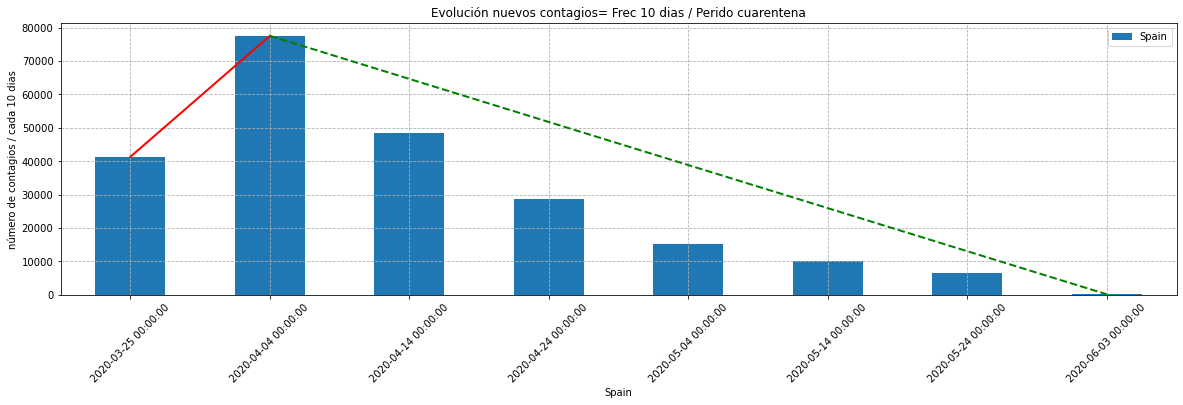

In [226]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
frecuenc_spain.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("Spain")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([0 ,1], [ 41312,77582],lw = 2,color='r')
plt.plot ([1 ,7], [77582,110 ],lw = 2,color='g',linestyle="--")

In [227]:
frecuenc_eeuu=t_n_eeuu.resample("10d", label="right").sum()
frecuenc_eeuu

date
2020-04-17    302029.0
2020-04-27    299389.0
2020-05-07    265422.0
2020-05-17    238922.0
2020-05-27    218905.0
2020-06-06    210358.0
2020-06-16    221409.0
2020-06-26    287292.0
2020-07-06    458181.0
2020-07-16    592032.0
2020-07-26    680955.0
2020-08-05    382485.0
Freq: 10D, Name: United States, dtype: float64

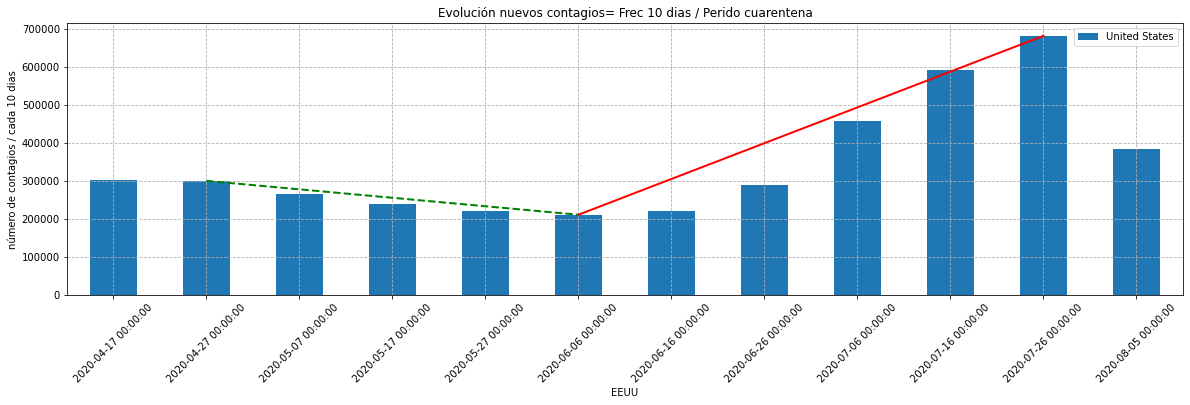

In [228]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
frecuenc_eeuu.plot(kind='bar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(linestyle ='dashed')
plt.xlabel("EEUU")
plt.ylabel("número de contagios / cada 10 dias")
plt.title("Evolución nuevos contagios= Frec 10 dias / Perido cuarentena")
plt.plot ([1 ,5], [ 299389,210358],lw = 2,color='g',linestyle="--")
plt.plot ([5 ,10], [ 210358,680955],lw = 2,color='r')